In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from plotly.offline import init_notebook_mode, plot

Import data from https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker#data in timeseries format.

In [16]:
data_dict=pd.read_csv('data/oxford.csv')

In [17]:
data_dict.keys()

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (su

In [19]:
data_dict.head()


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
fulldata=pd.read_csv('data/oxford.csv',low_memory=False)
fulldata.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
       'V2B_Va

In [95]:
measurelist=['C1_School closing',  'C2_Workplace closing',  'C3_Cancel public events', 'C4_Restrictions on gatherings',  'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
countrieslist=fulldata['CountryName'].unique()
countrydata=pd.DataFrame(columns=['CountryName','MaxResponse','C1_School closing',  'C2_Workplace closing',  'C3_Cancel public events', 'C4_Restrictions on gatherings',  'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines'])
countrydata['CountryName']=countrieslist
countrydata.head()


,CountryName,MaxResponse,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


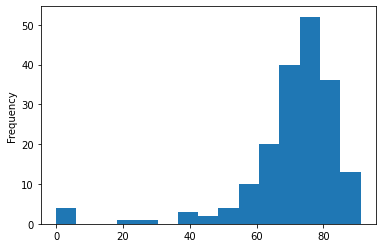

In [96]:
for country in countrieslist:
    countrydata.loc[countrydata['CountryName']==country,'MaxResponse']=(fulldata[fulldata['CountryName']==country]['GovernmentResponseIndex']).max()
    for measure in measurelist: 
        countrydata.loc[countrydata['CountryName']==country,measure]=(fulldata[fulldata['CountryName']==country][measure]).max()
countrydata['MaxResponse'].plot.hist(bins=15)
plt.show()


In [97]:
for measure in measurelist:
    countrydata[measure]=countrydata[measure].apply(lambda x: float(x))
countrydata['MaxResponse']=countrydata['MaxResponse'].apply(lambda x: float(x))
countrydata.dtypes
countrydata.describe()

,MaxResponse,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,1.850000e+02,1.860000e+02
mean,70.766720,2.940860,2.758065,1.962366,3.865591,1.532258,2.247312,1.854839,3.801075,1.327957,1.618280,2.0,2.881720,1.854839,3.117668e+09,3.645275e+08
std,15.199981,0.314939,0.530746,0.240905,0.507457,0.616470,0.715178,0.422864,0.474426,0.645126,0.632019,0.0,0.398632,0.396475,2.007424e+10,1.636908e+09
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.0,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,66.942500,3.000000,3.000000,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.0,3.000000,2.000000,3.000000e+06,0.000000e+00
50%,73.490000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.0,3.000000,2.000000,4.700000e+07,0.000000e+00
75%,80.080000,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.0,3.000000,2.000000,2.972281e+08,2.147500e+07
max,91.150000,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.0,3.000000,2.000000,2.420000e+11,1.575000e+10


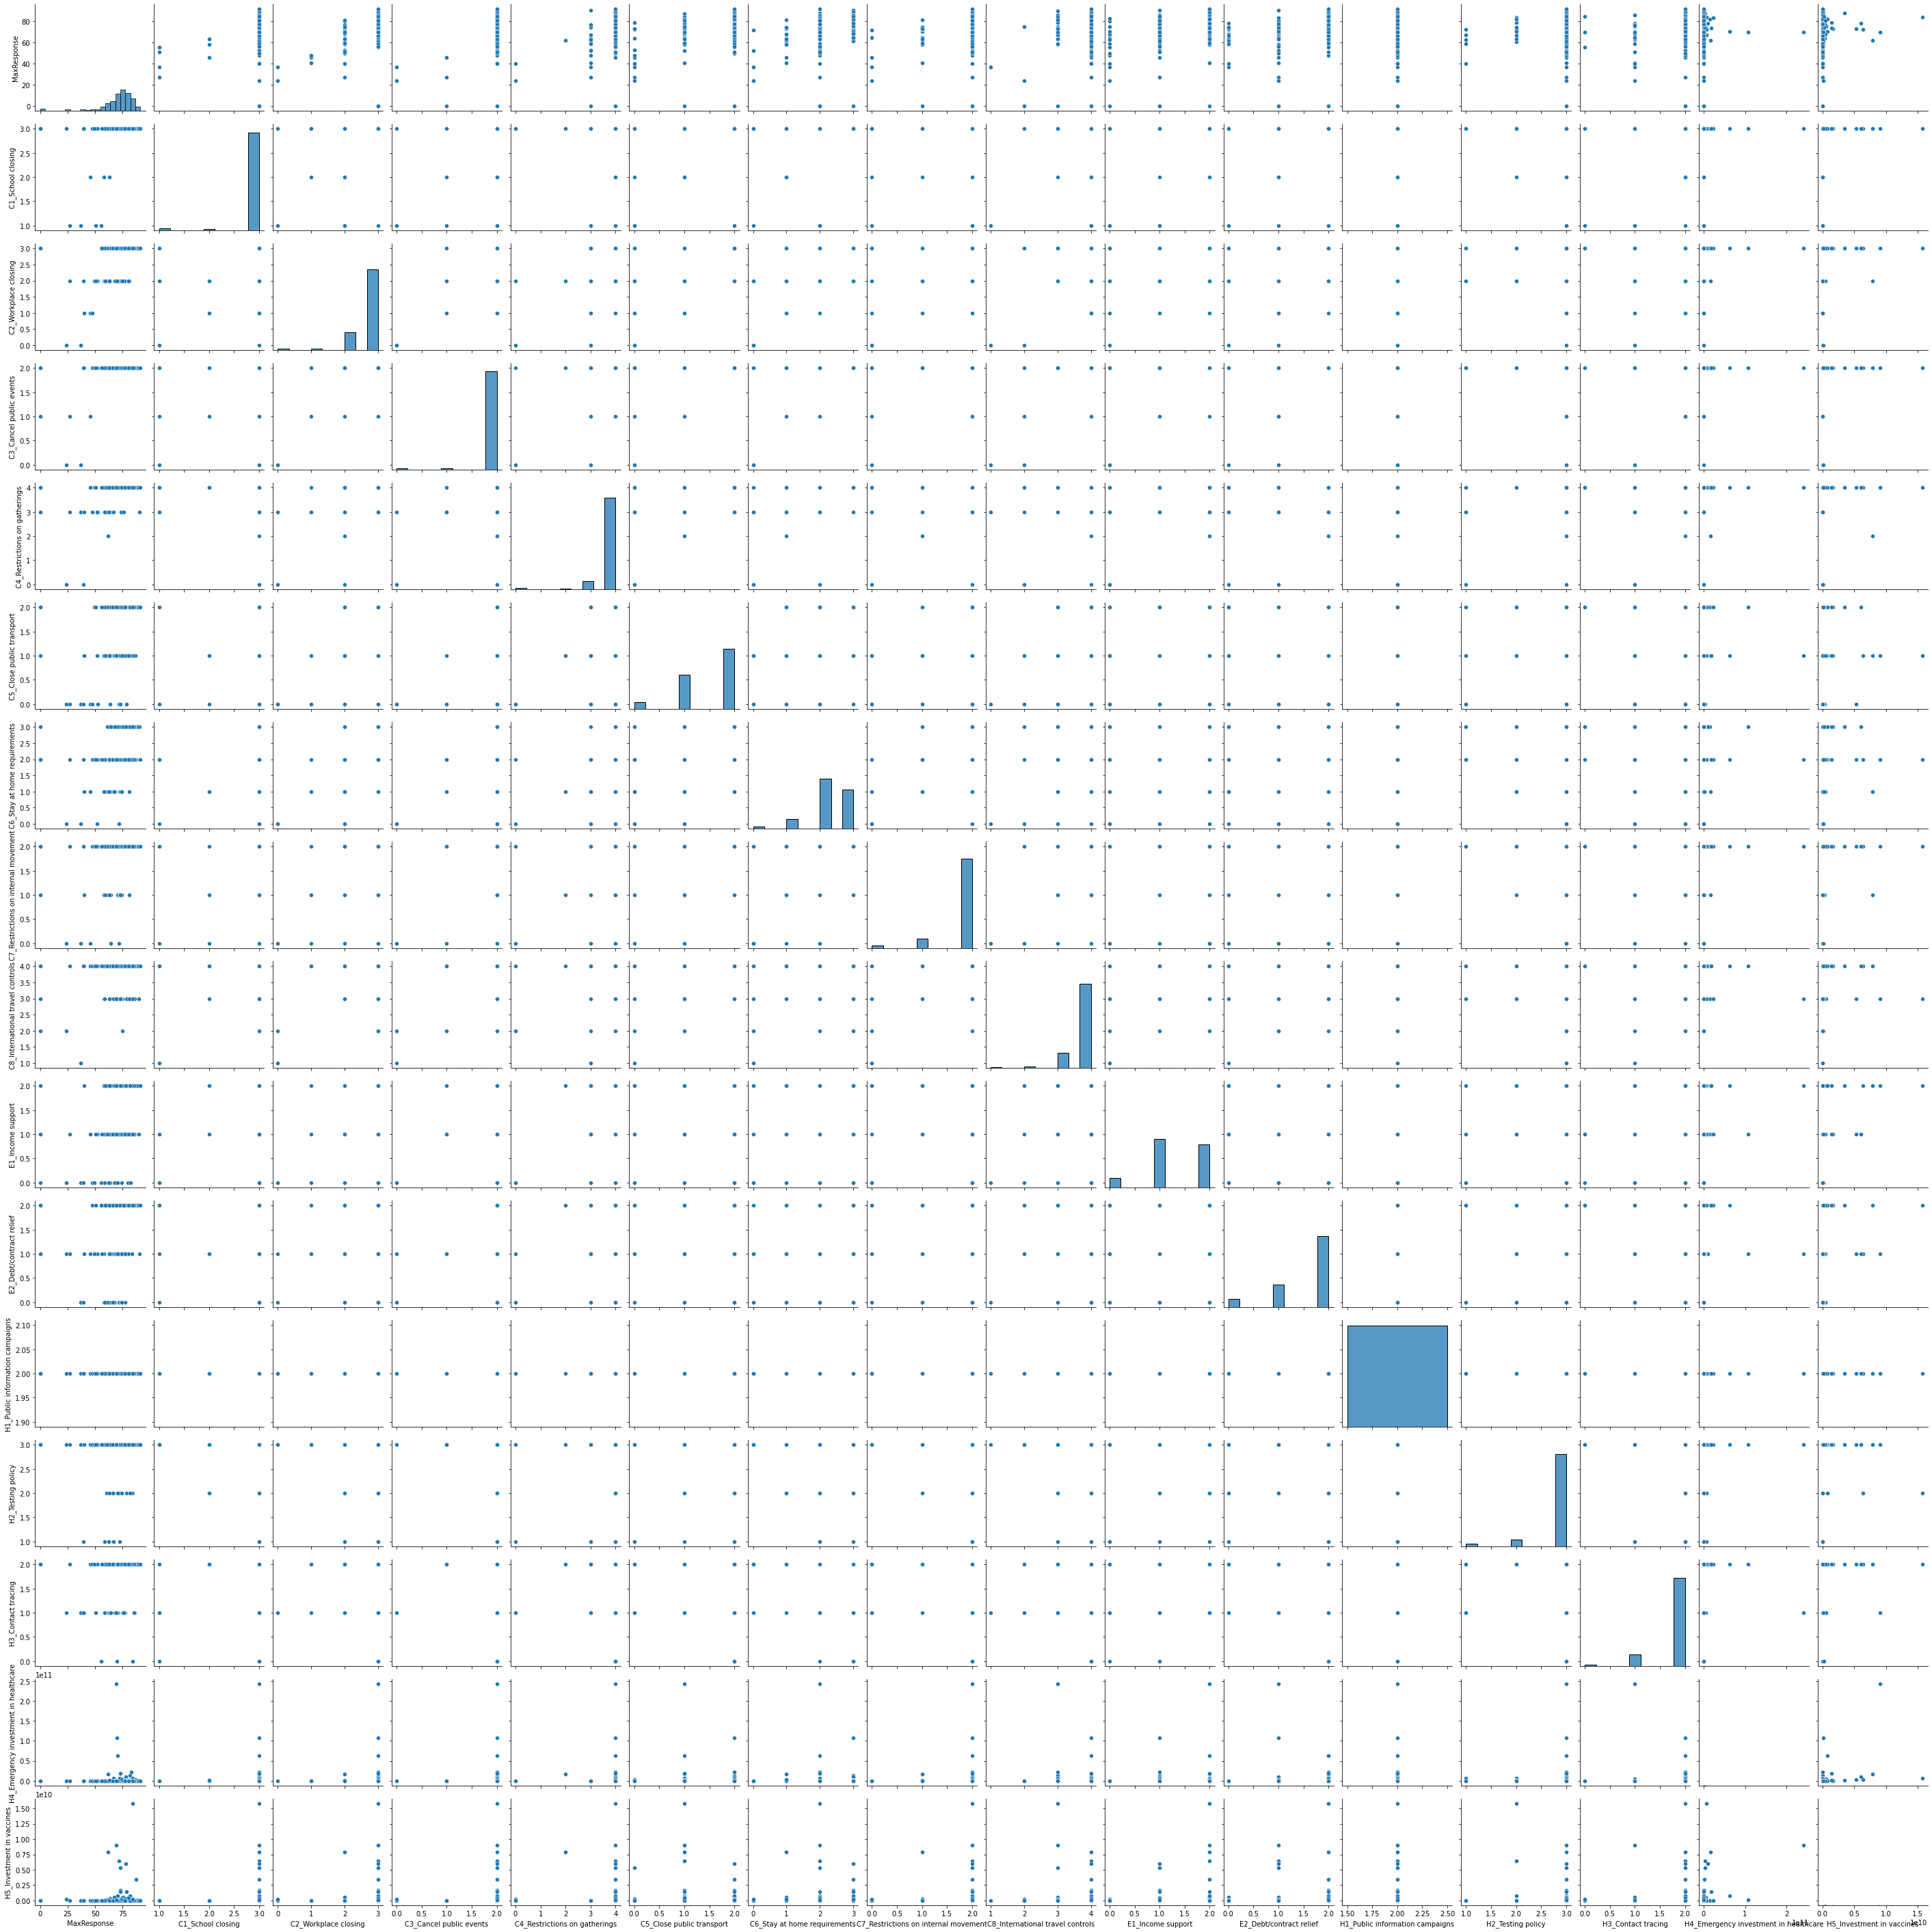

In [98]:
sns.pairplot(countrydata.iloc[:,1:])

In [99]:
countrydata['group']=countrydata['MaxResponse'].apply(lambda x: 1 if x>75 else 0)

C:\Users\HP 14S\AppData\Local\Temp\ipykernel_10680\486581569.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 3))


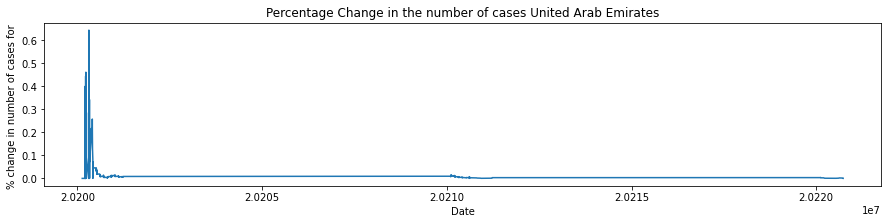

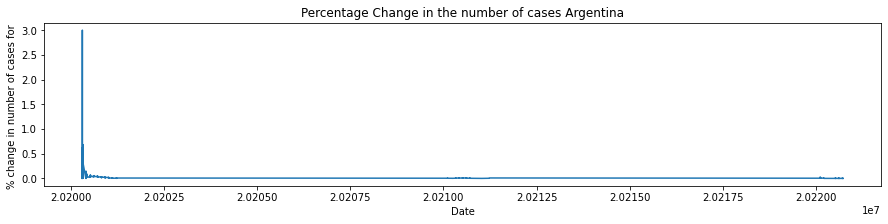

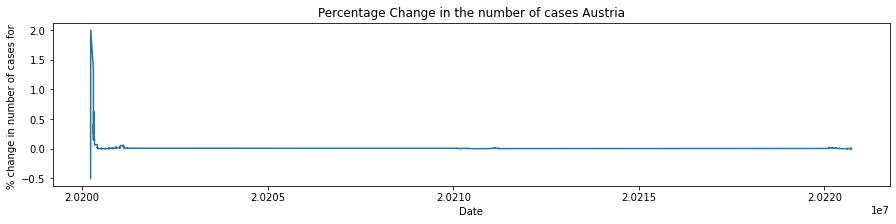

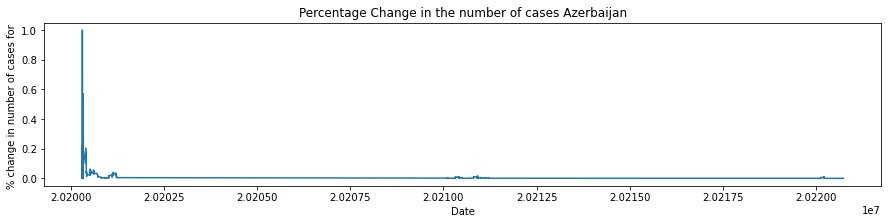

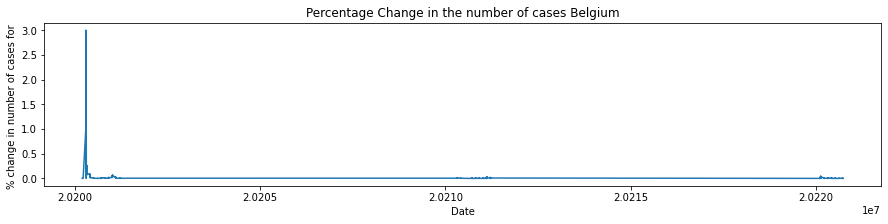

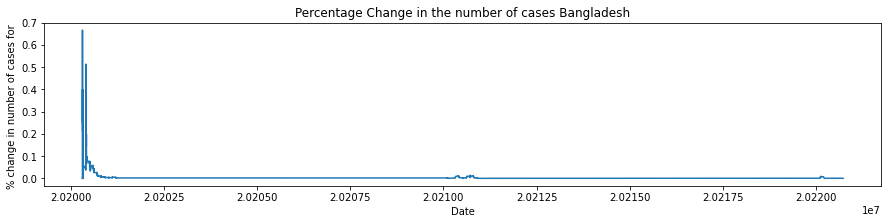

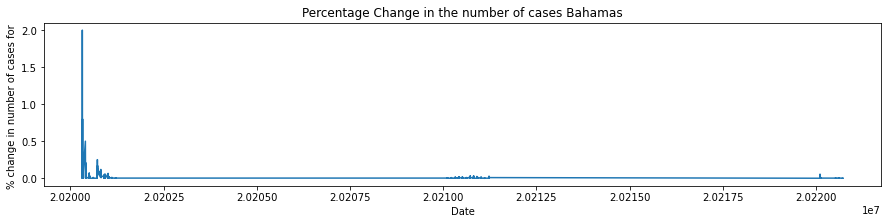

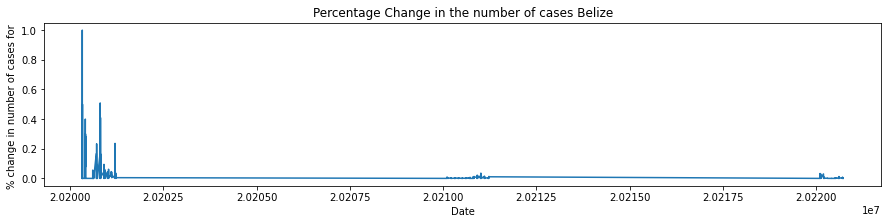

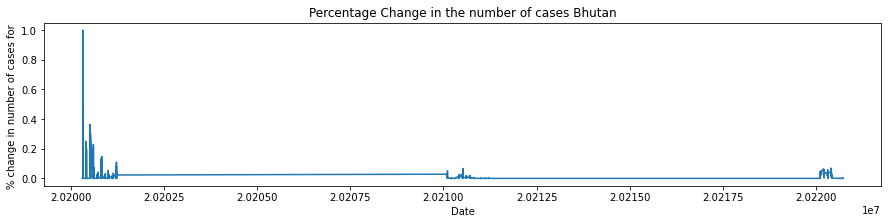

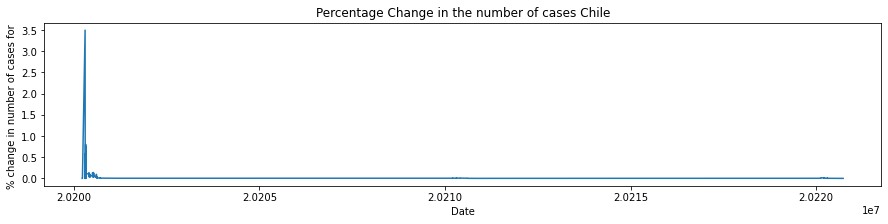

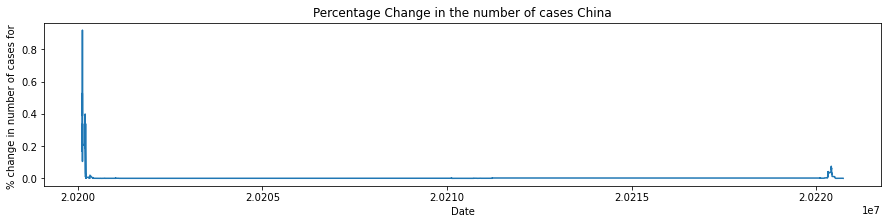

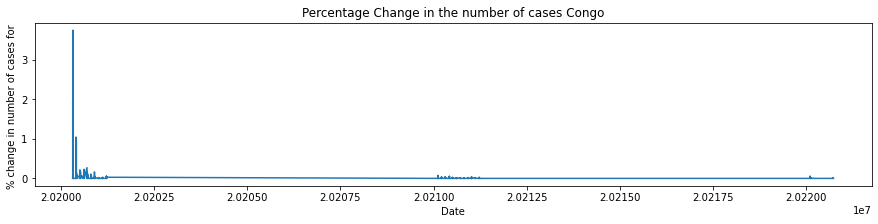

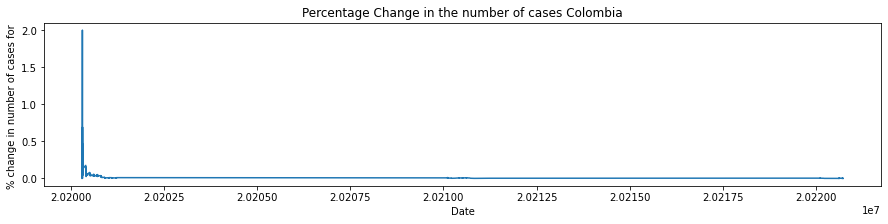

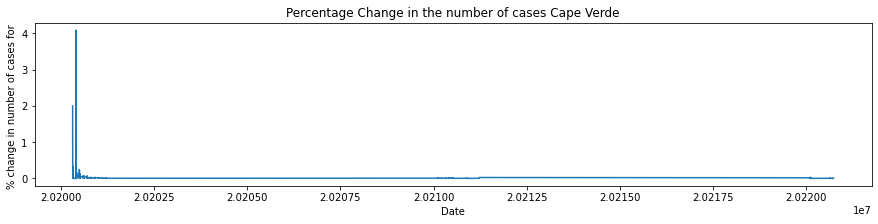

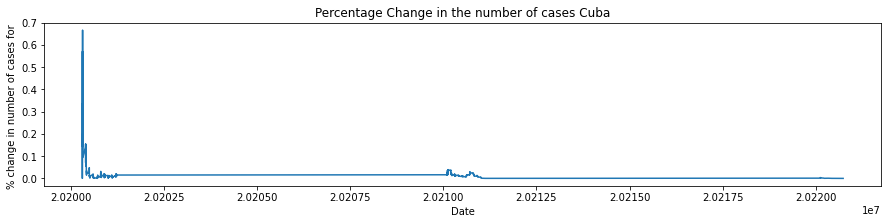

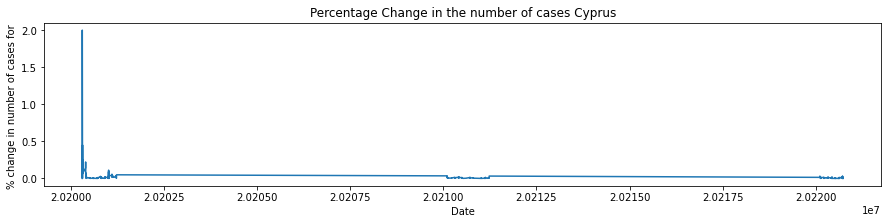

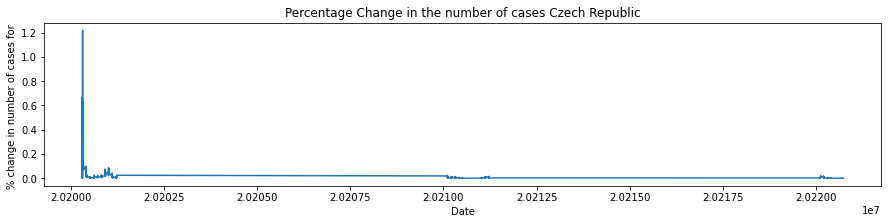

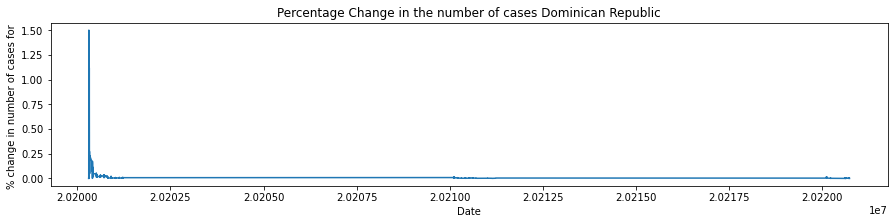

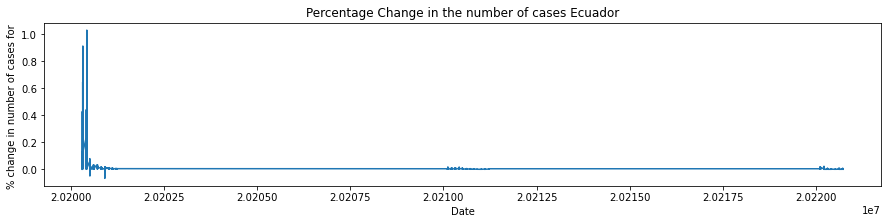

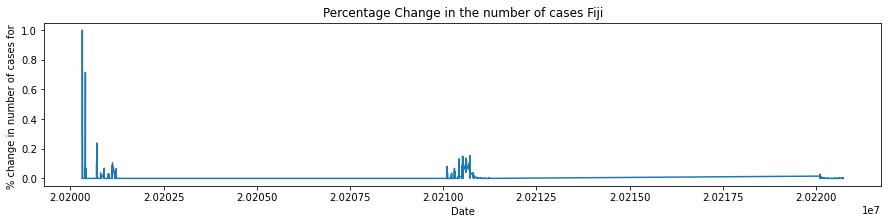

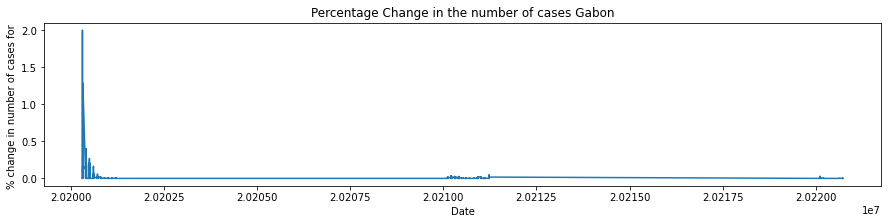

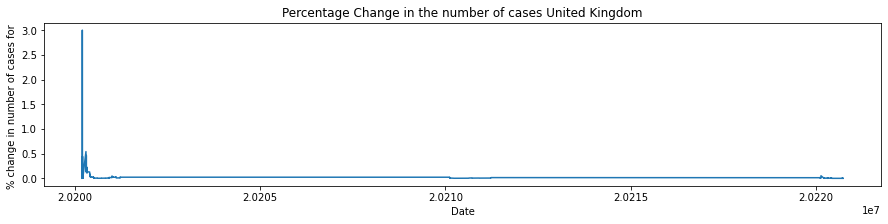

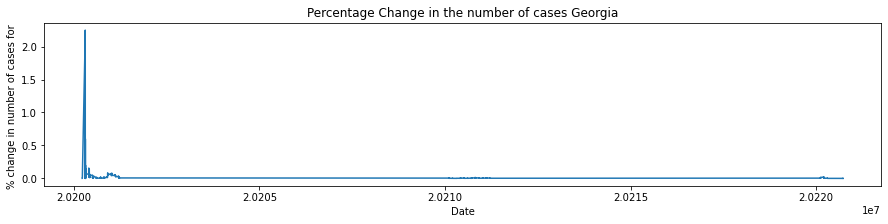

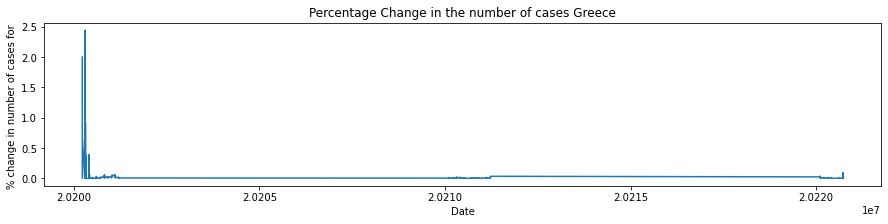

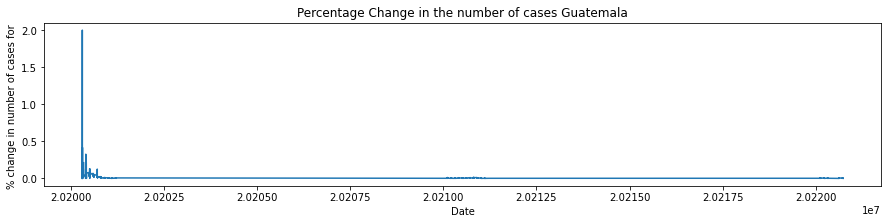

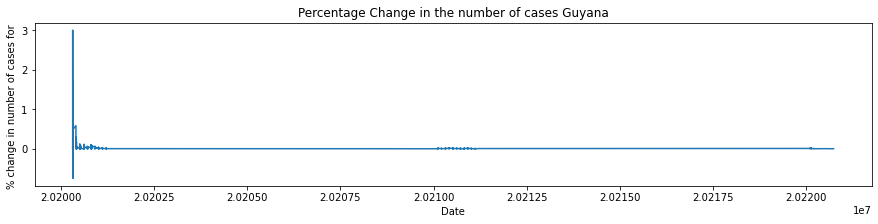

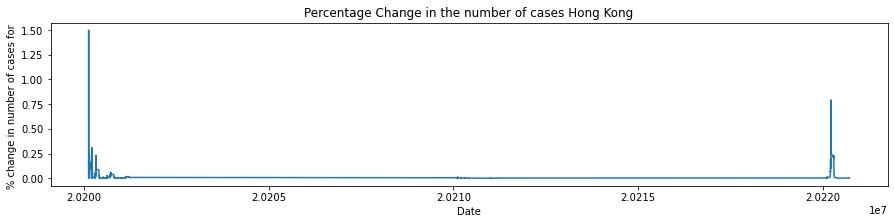

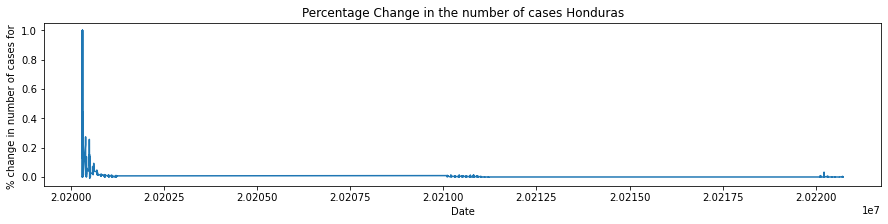

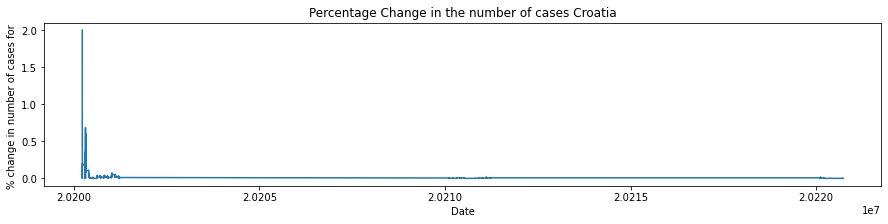

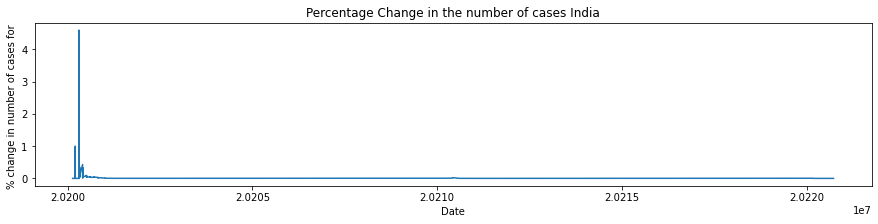

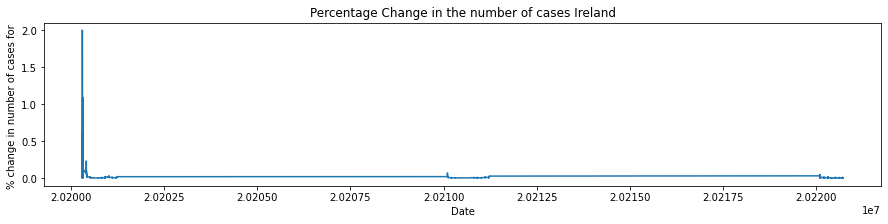

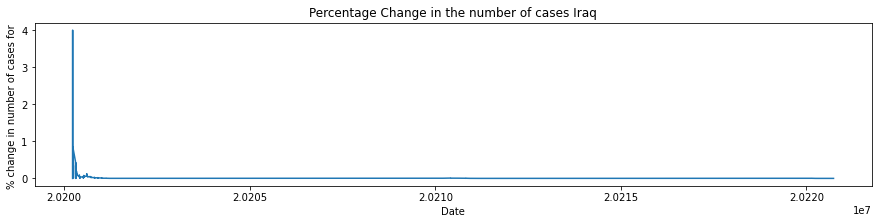

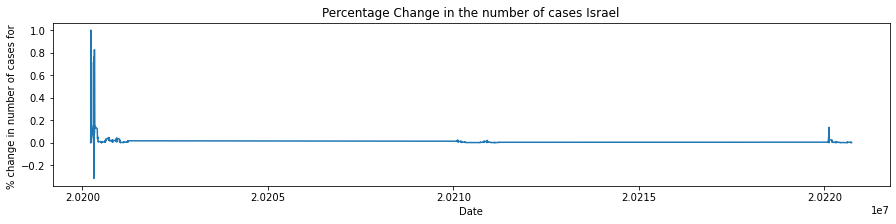

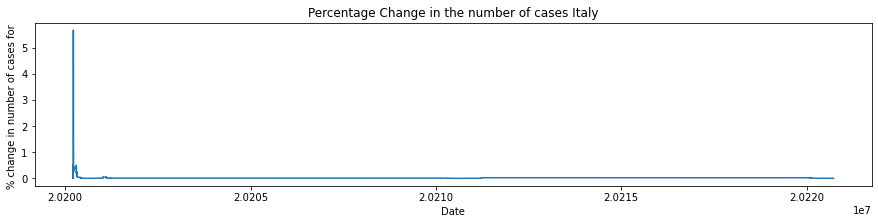

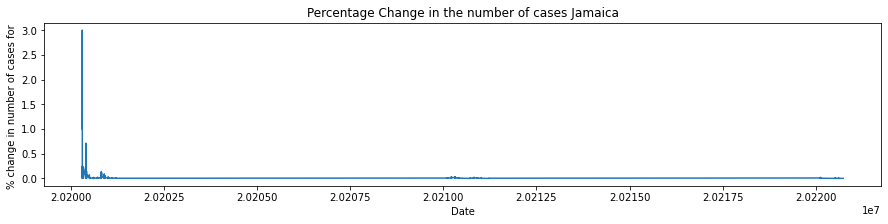

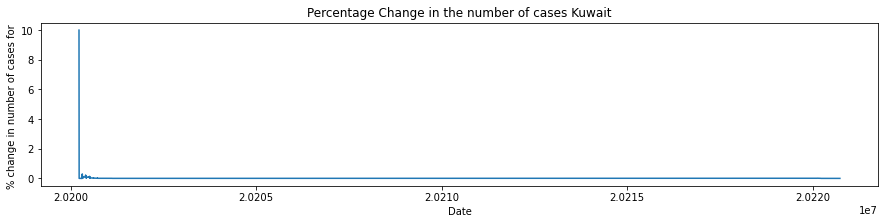

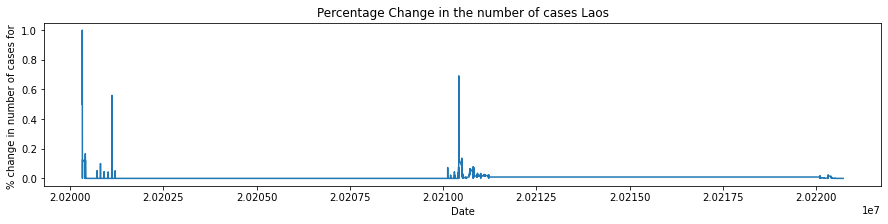

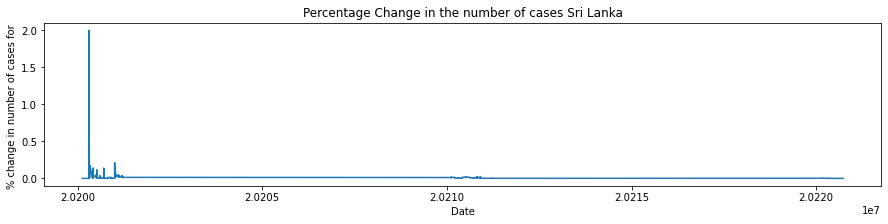

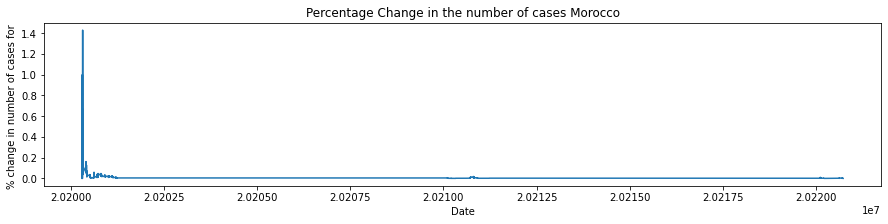

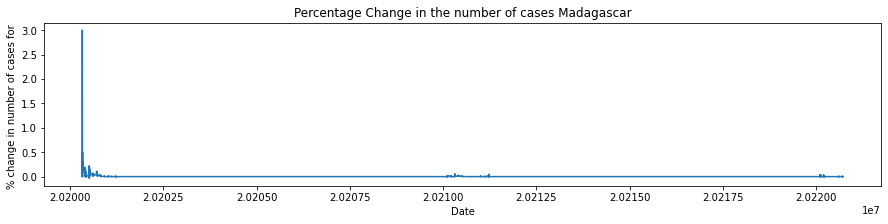

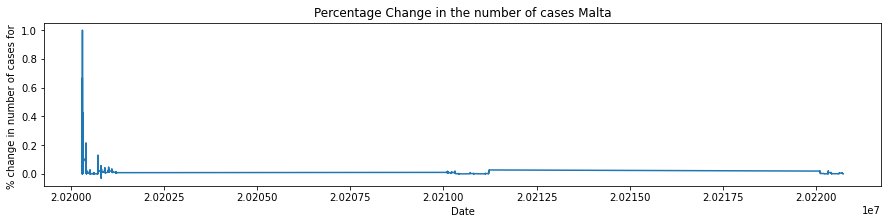

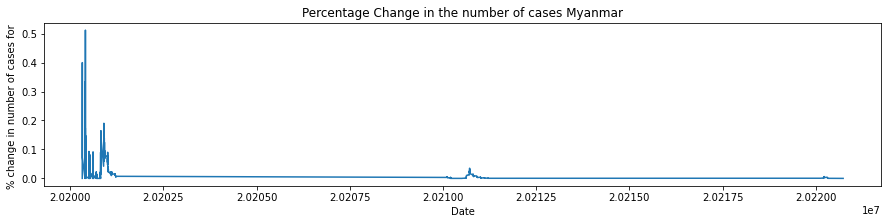

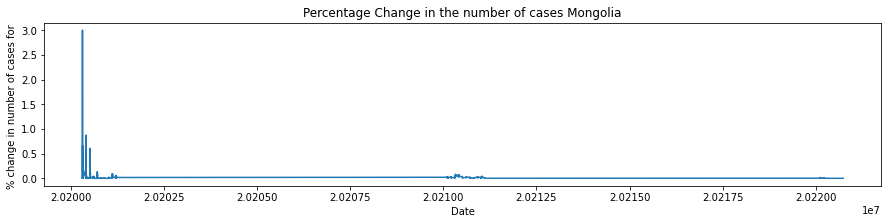

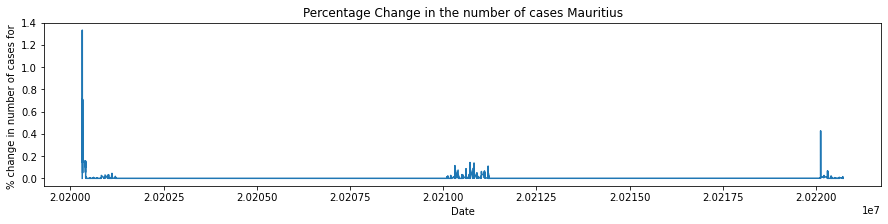

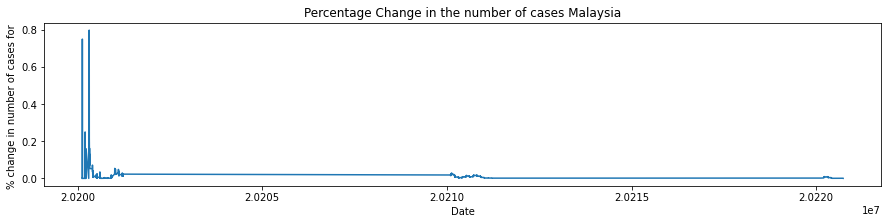

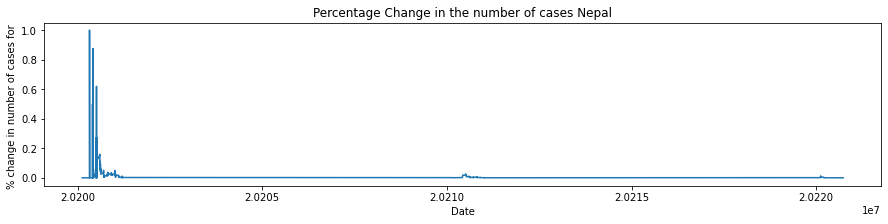

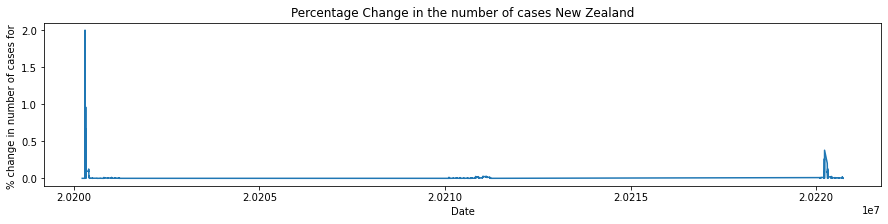

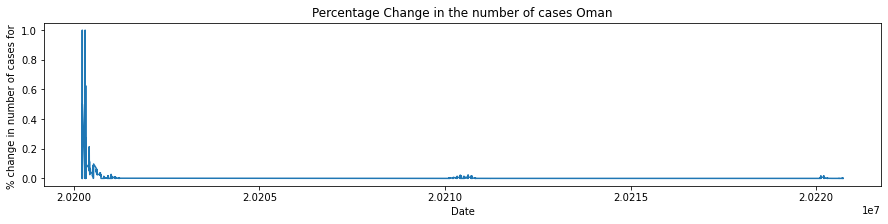

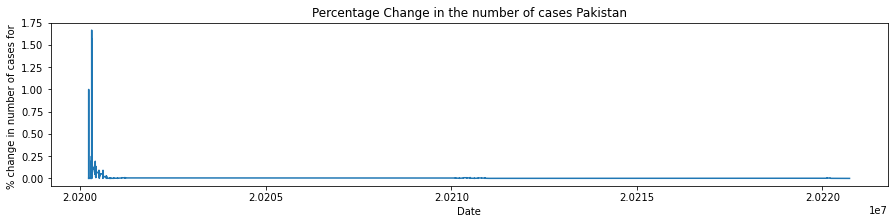

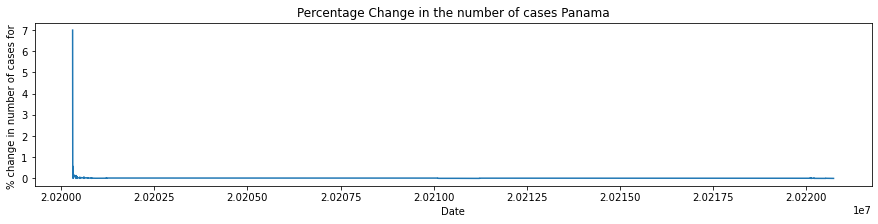

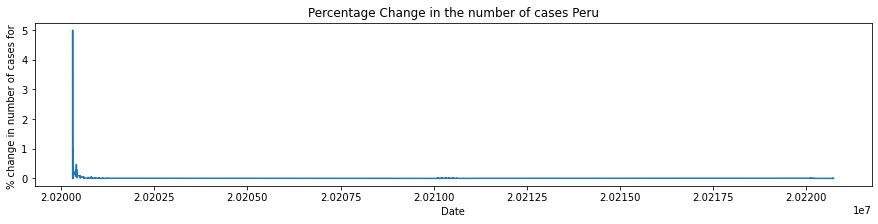

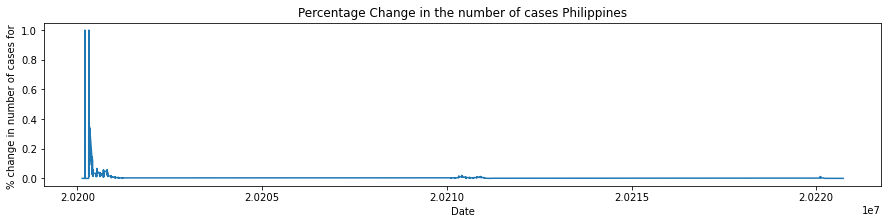

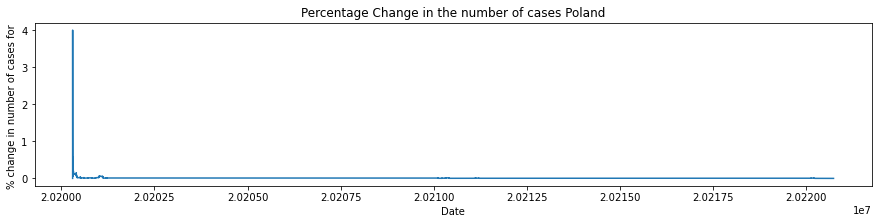

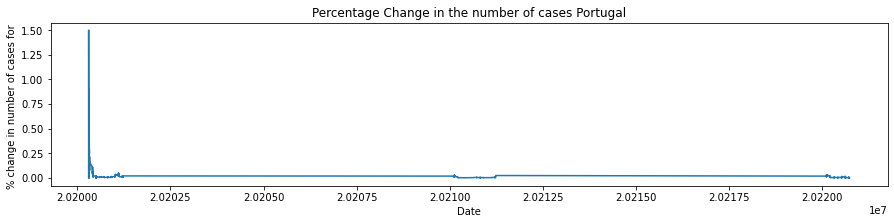

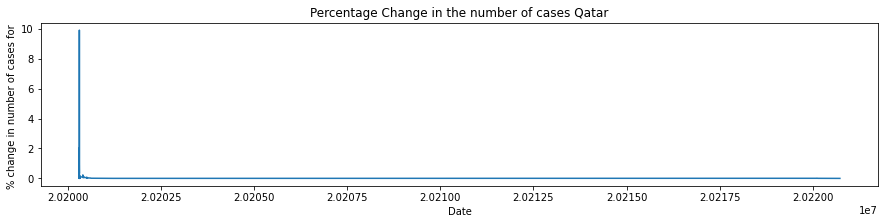

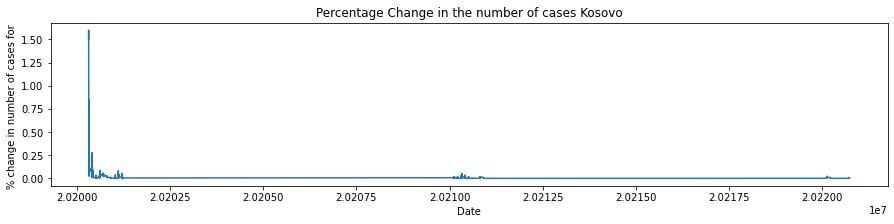

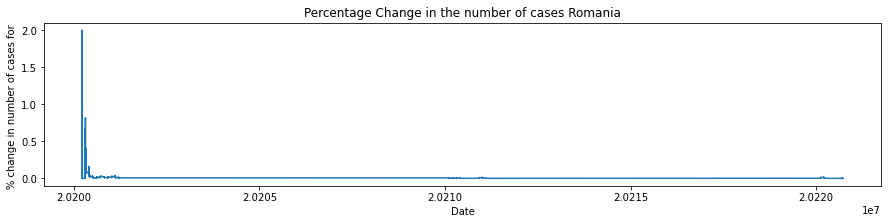

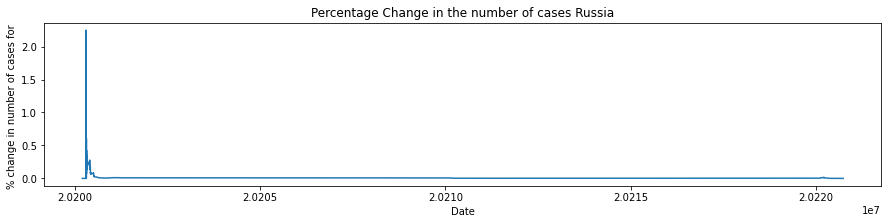

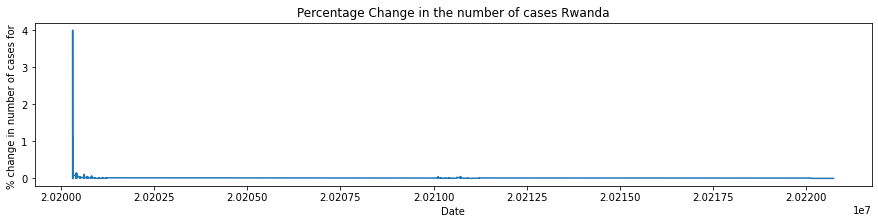

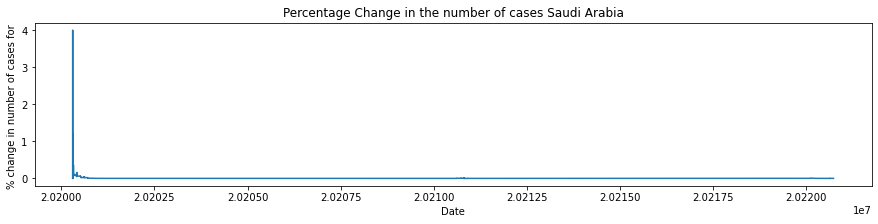

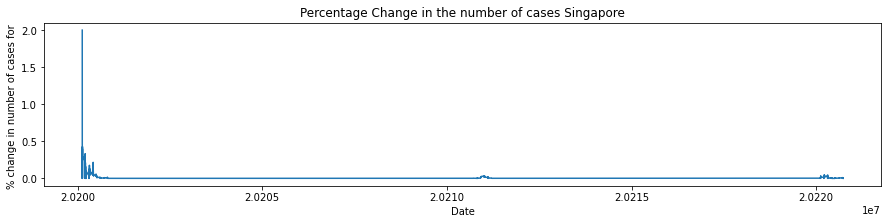

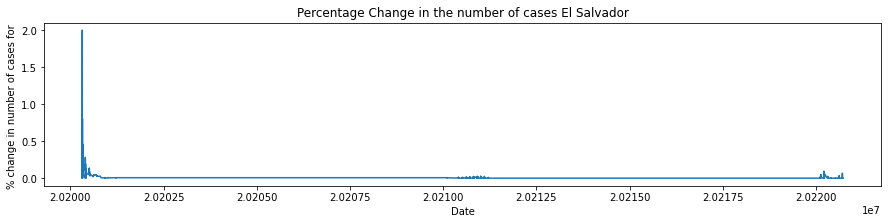

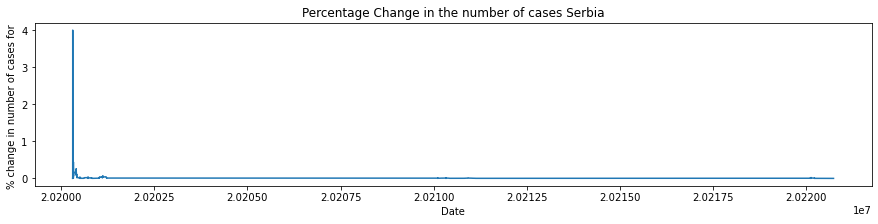

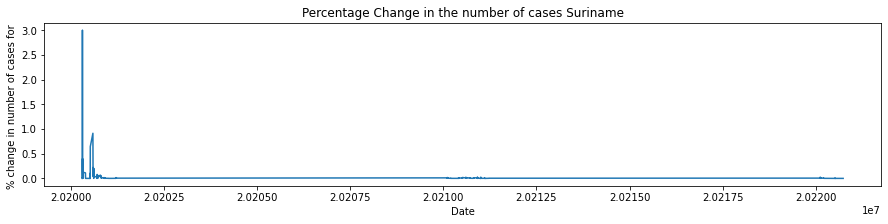

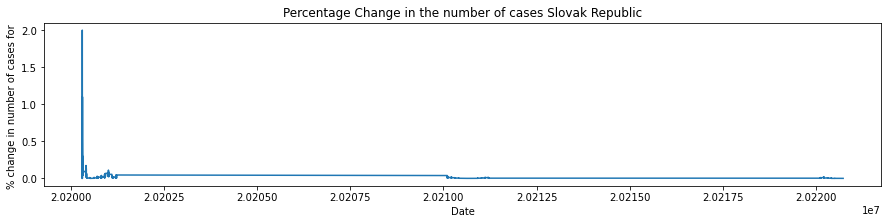

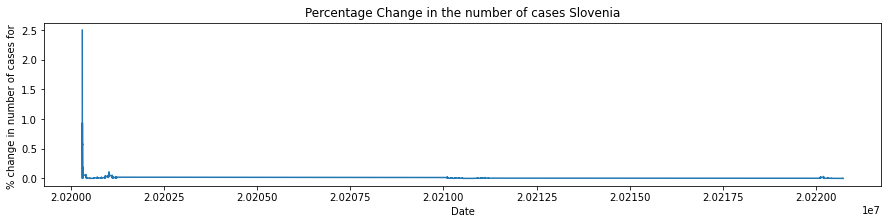

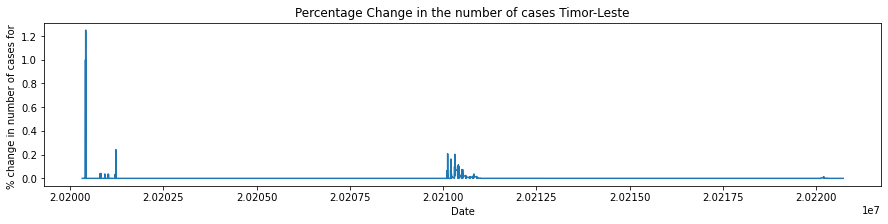

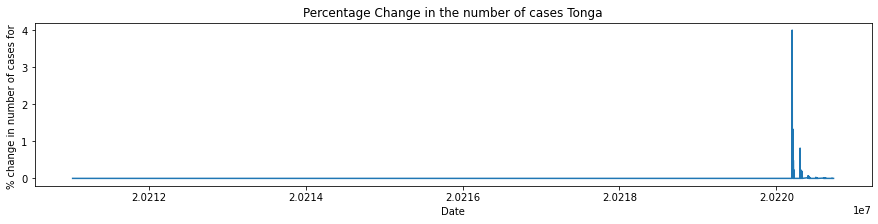

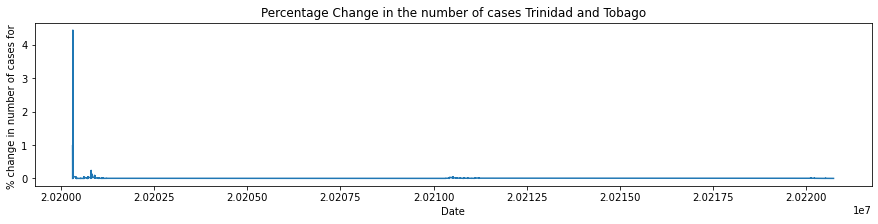

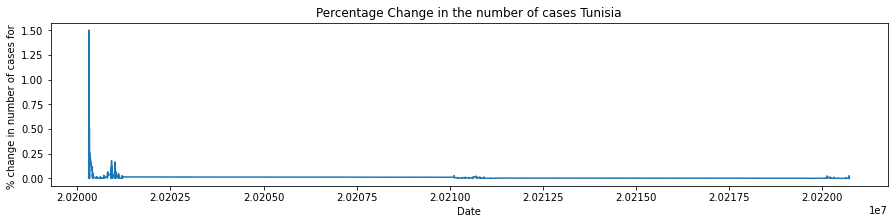

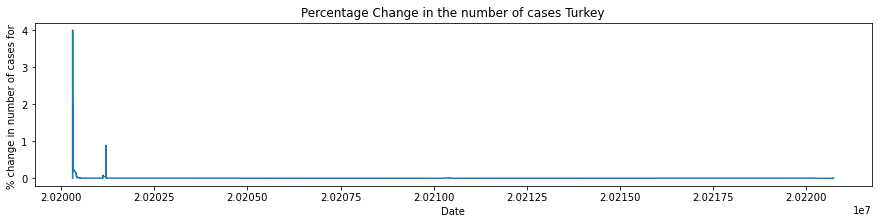

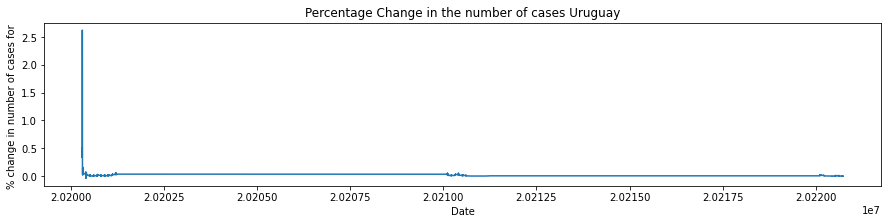

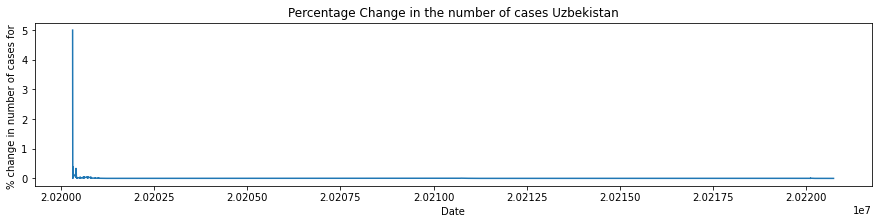

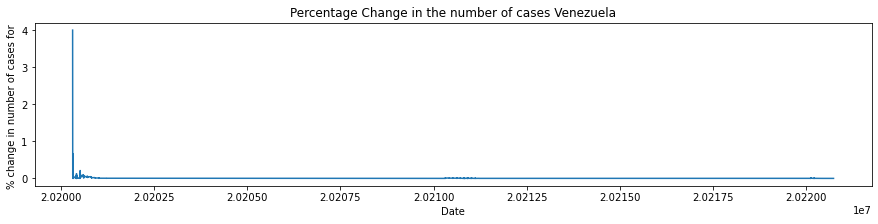

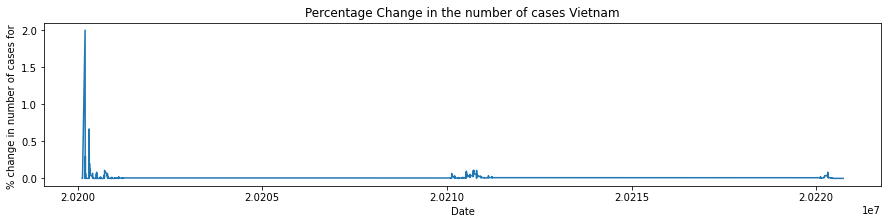

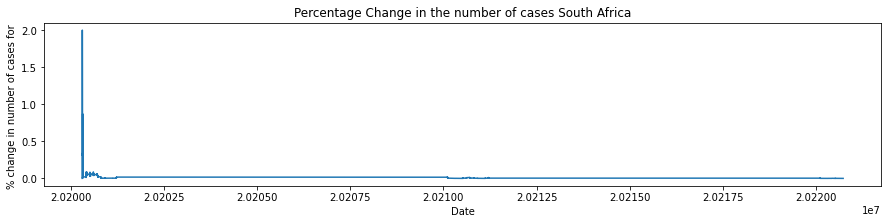

In [100]:
for country in countrydata[countrydata['group']==1]['CountryName'].unique():
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(fulldata[fulldata["CountryName"]==country]["Date"], fulldata[fulldata["CountryName"]==country]["ConfirmedCases"].pct_change())
    plt.title("Percentage Change in the number of cases "+country)
    plt.xlabel("Date")
    plt.ylabel("% change in number of cases for ")

C:\Users\HP 14S\AppData\Local\Temp\ipykernel_10680\1926489509.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 3))


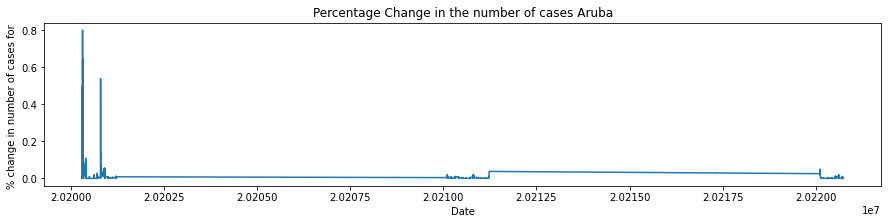

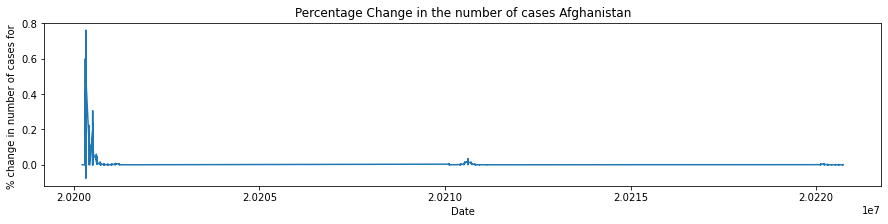

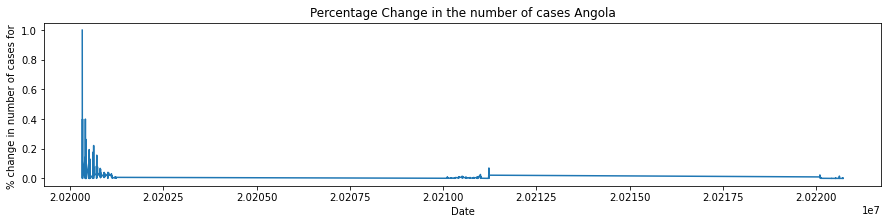

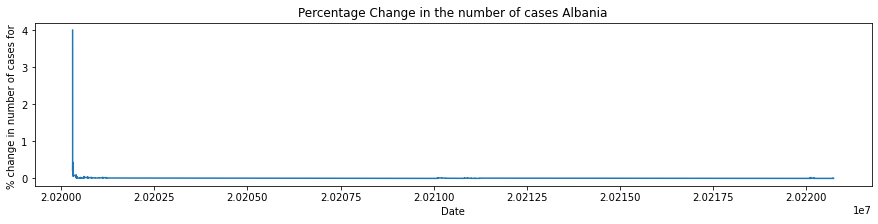

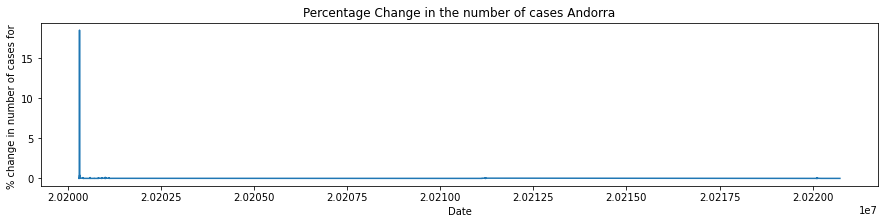

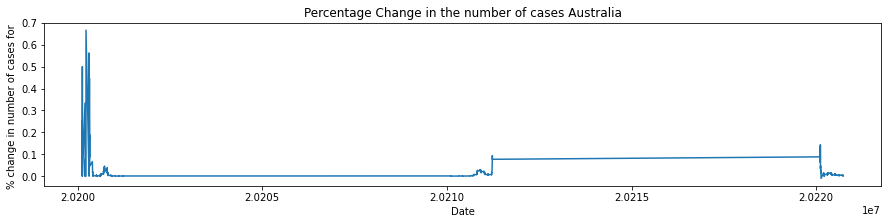

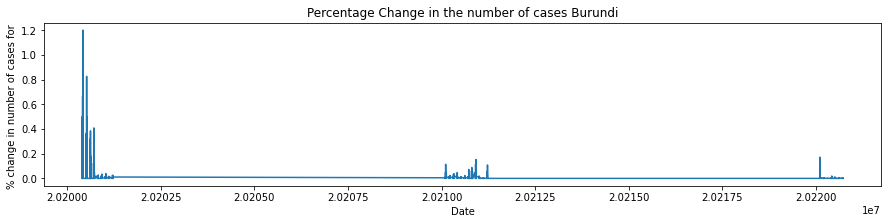

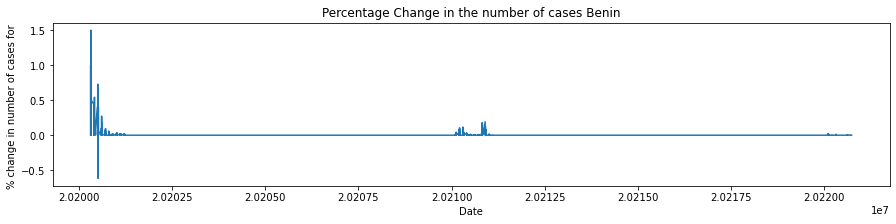

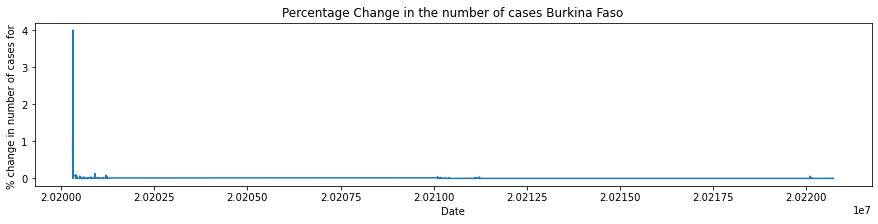

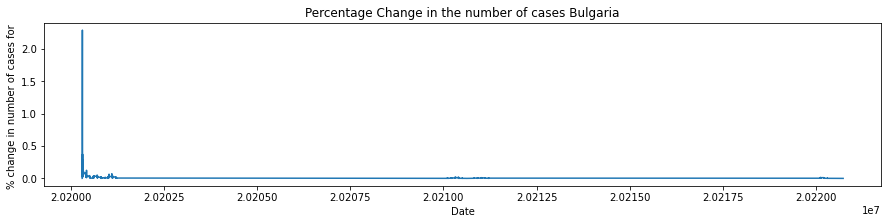

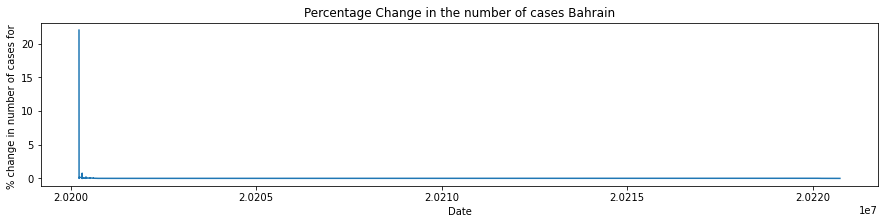

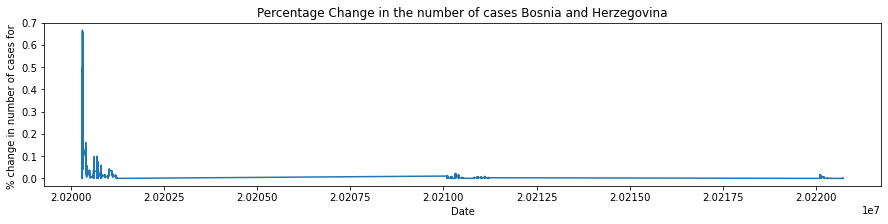

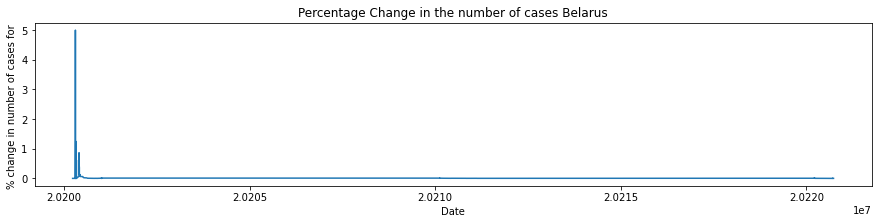

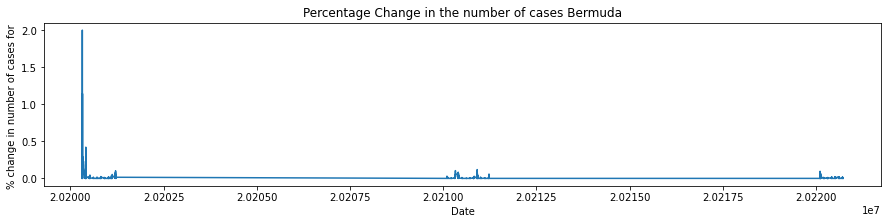

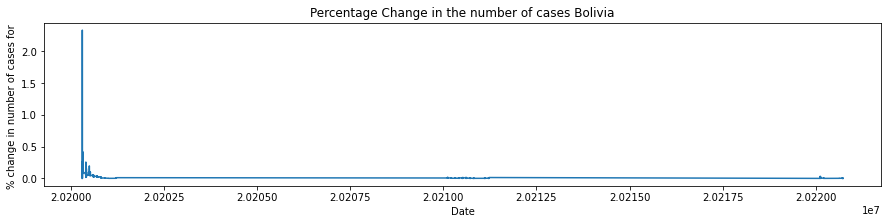

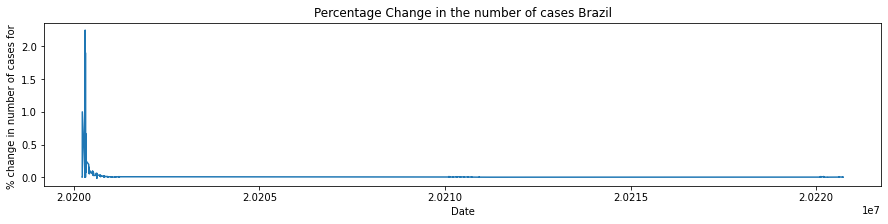

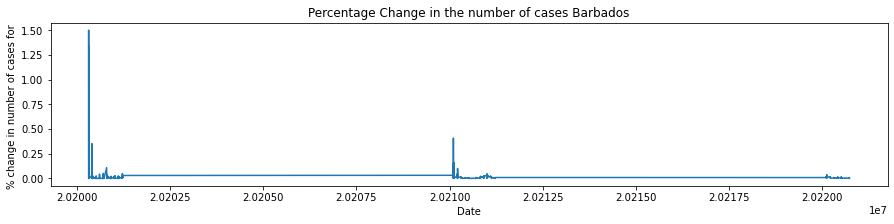

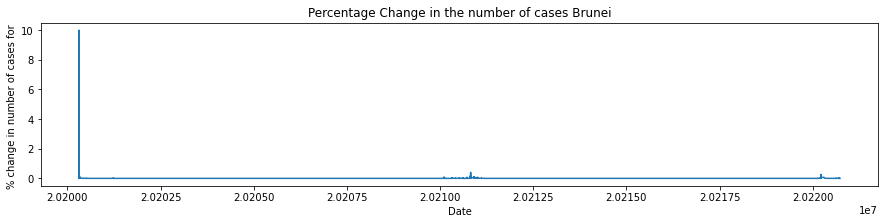

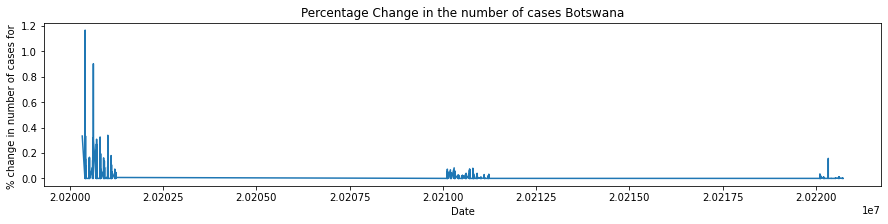

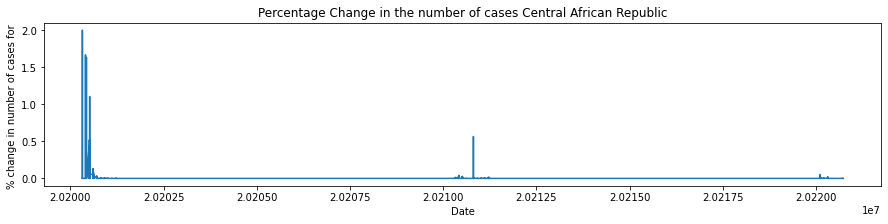

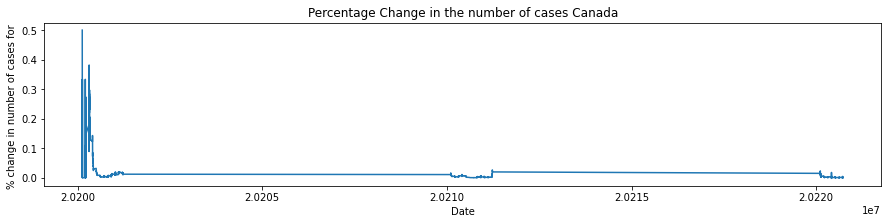

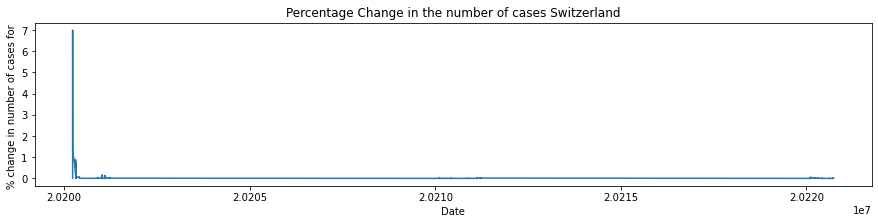

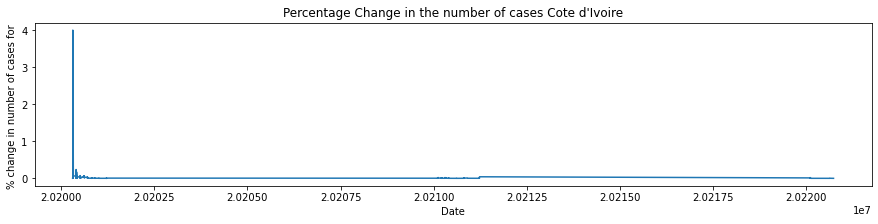

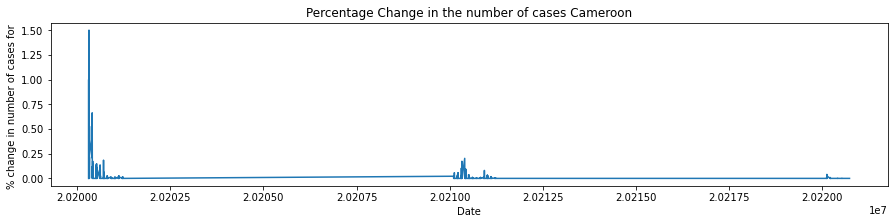

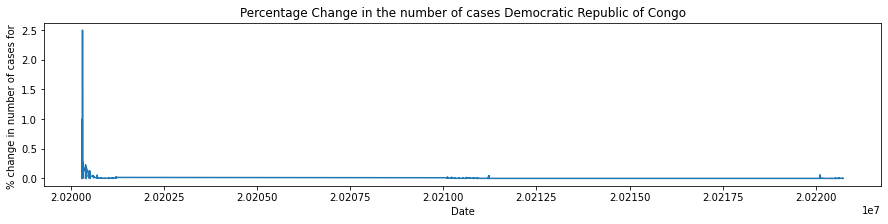

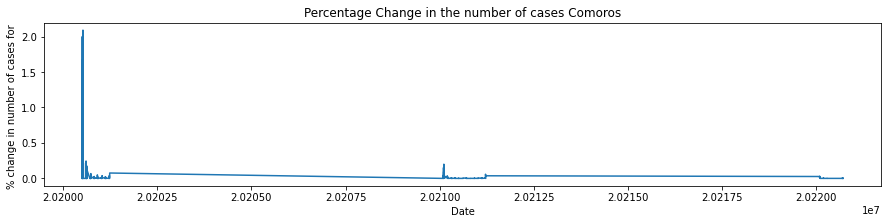

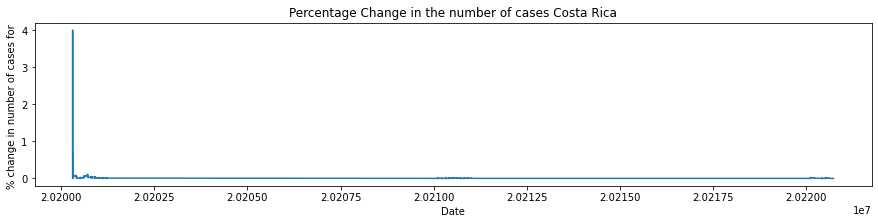

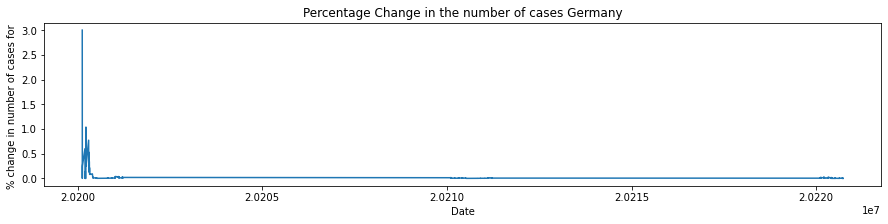

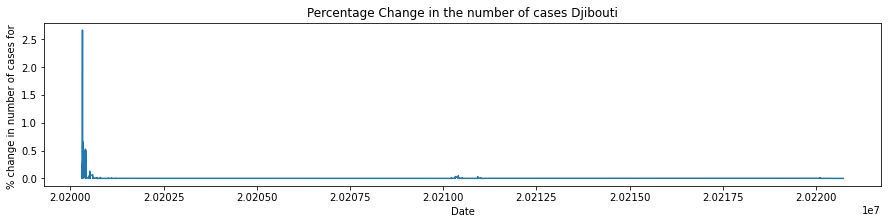

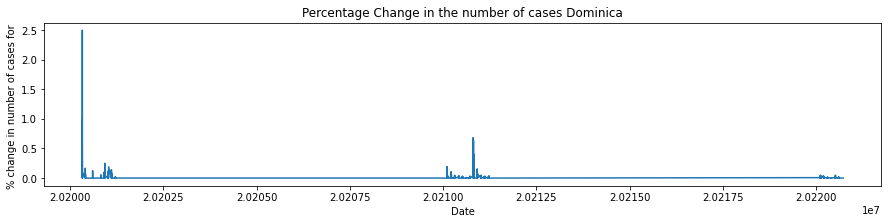

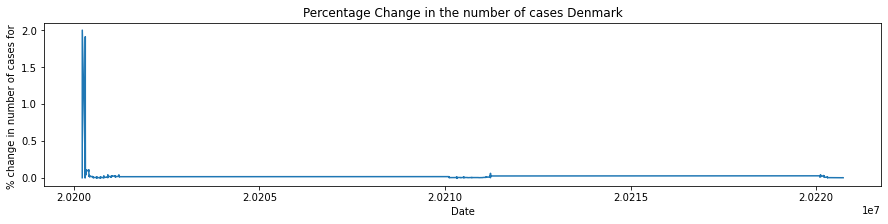

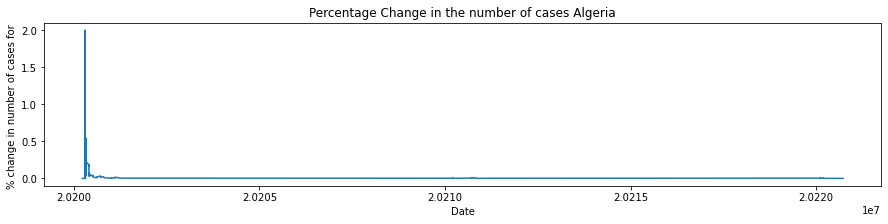

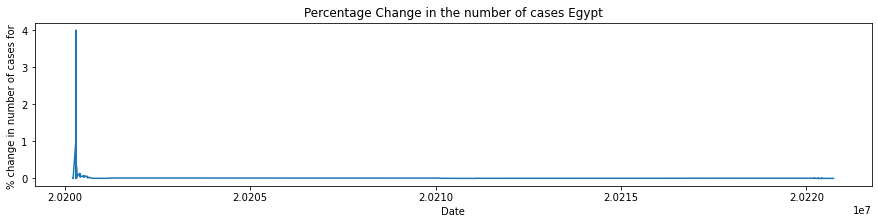

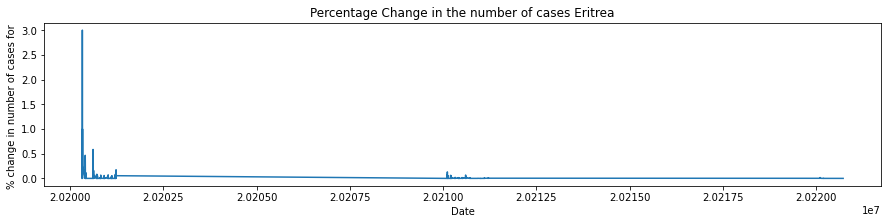

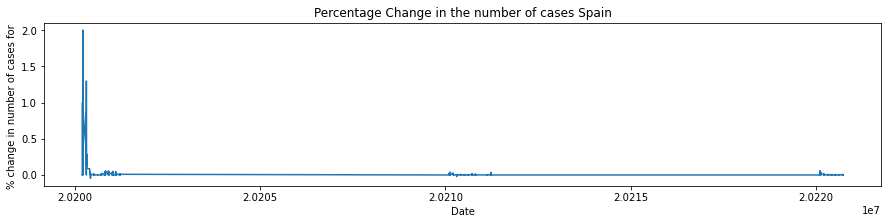

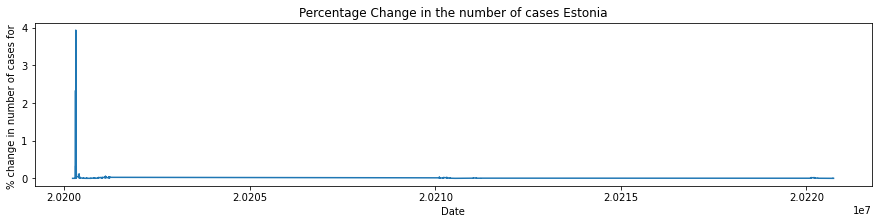

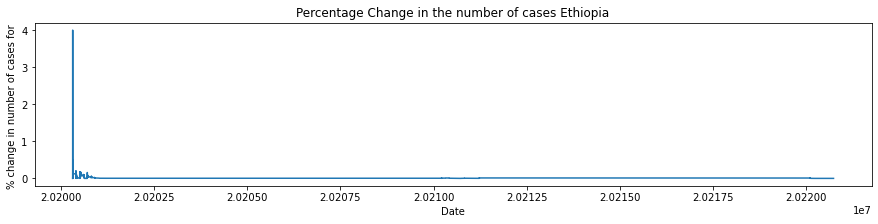

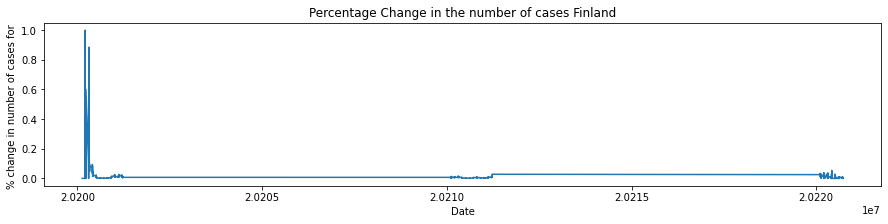

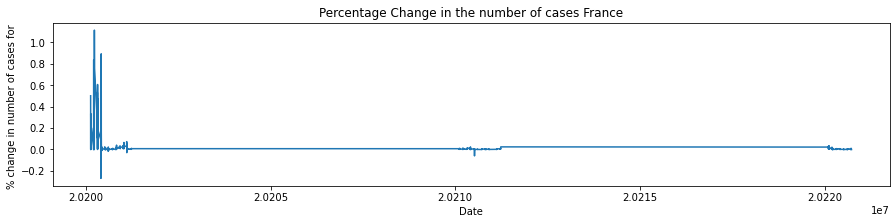

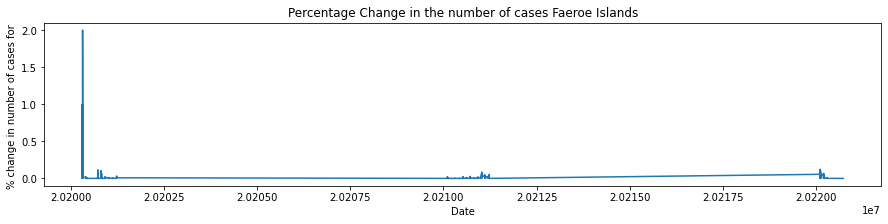

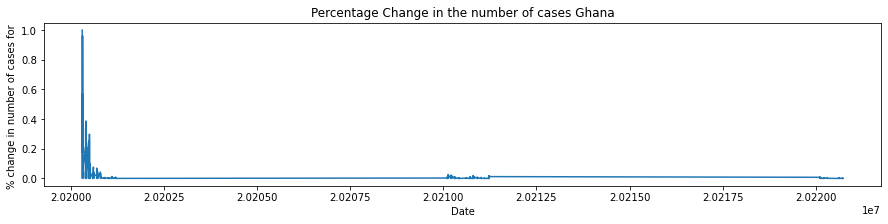

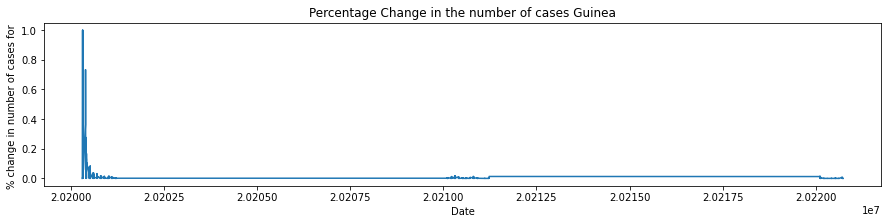

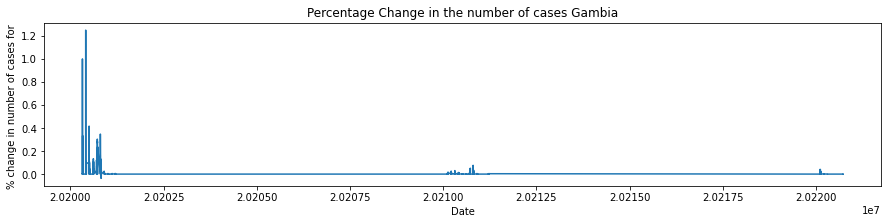

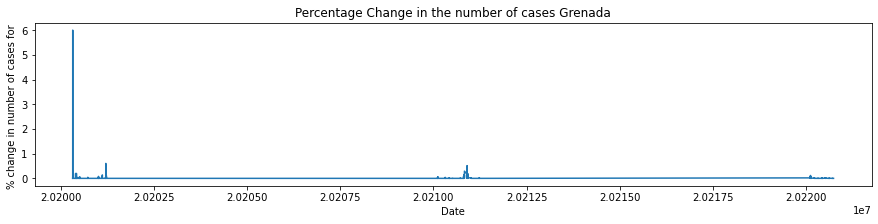

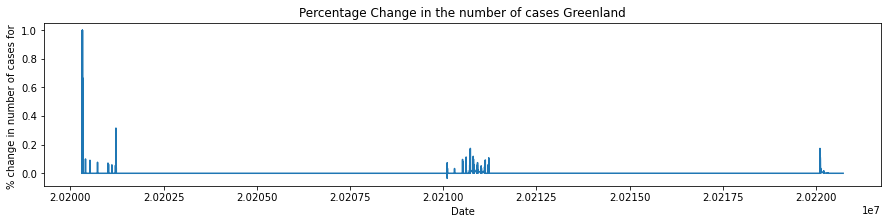

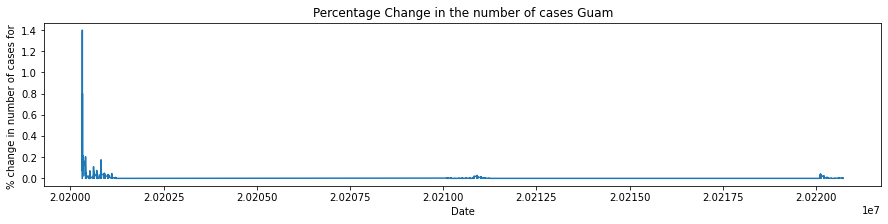

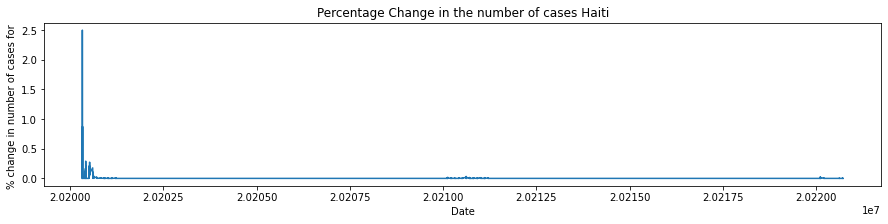

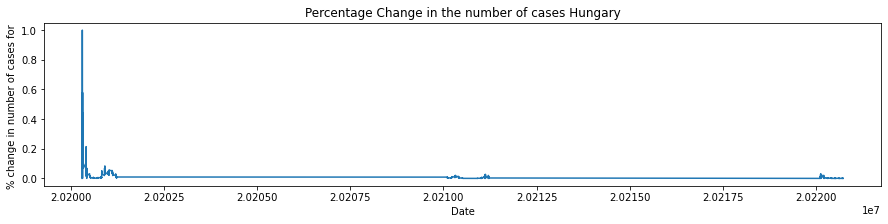

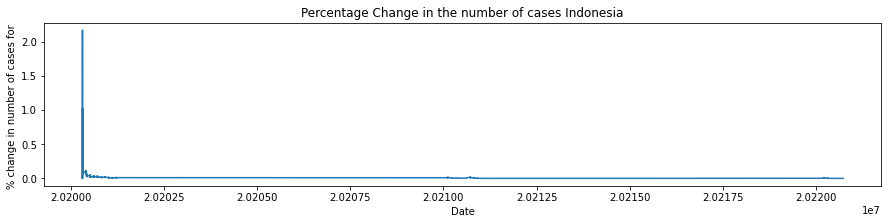

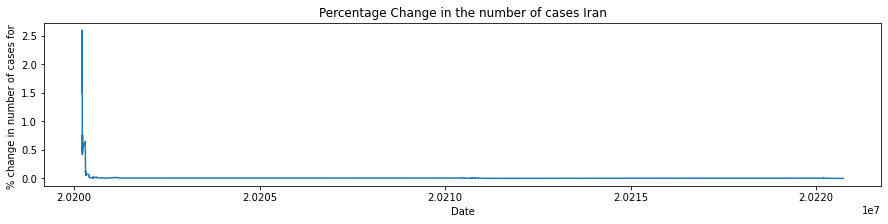

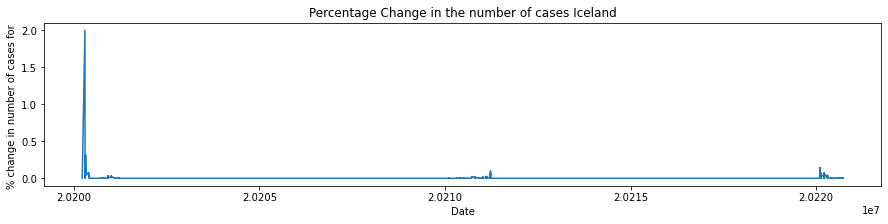

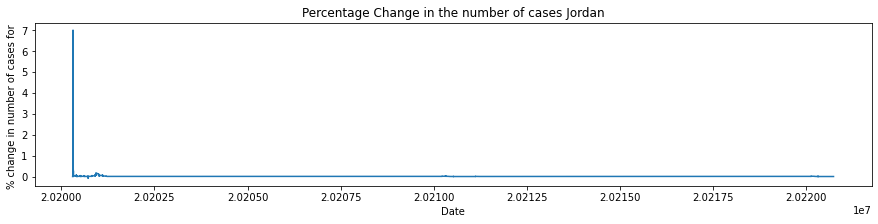

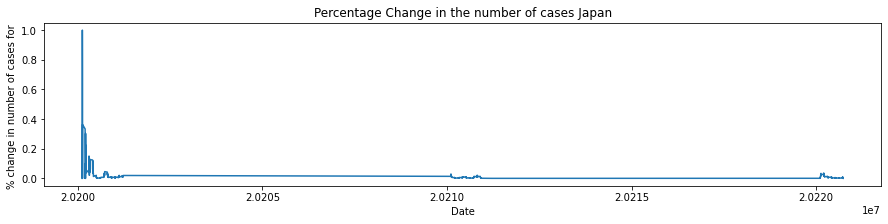

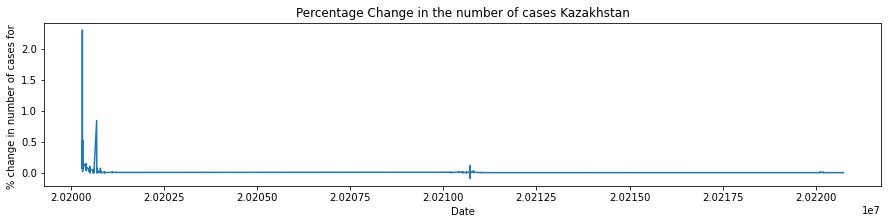

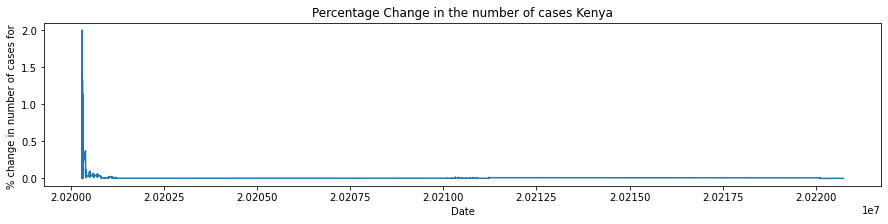

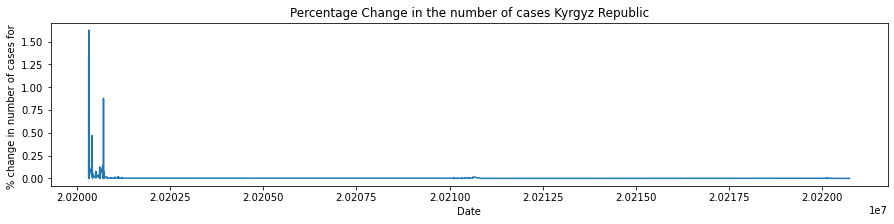

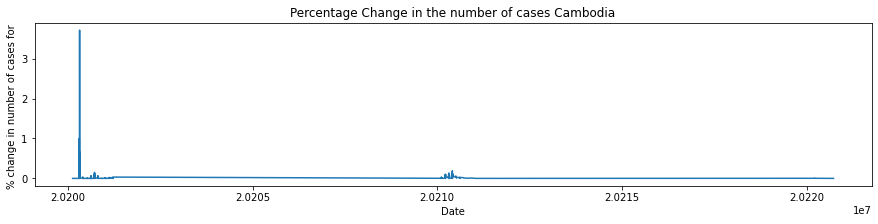

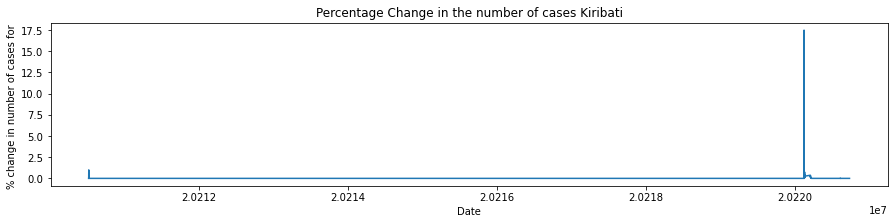

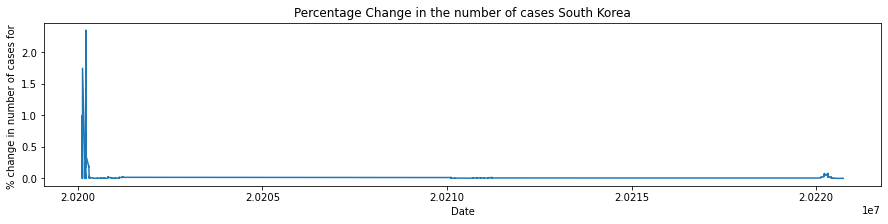

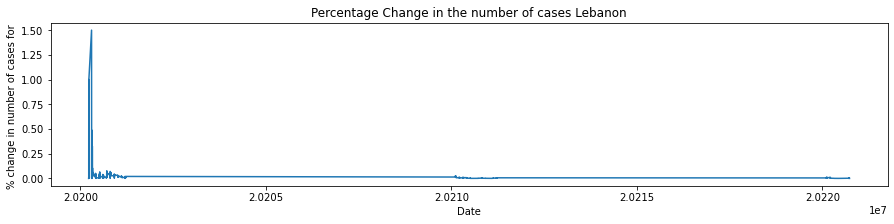

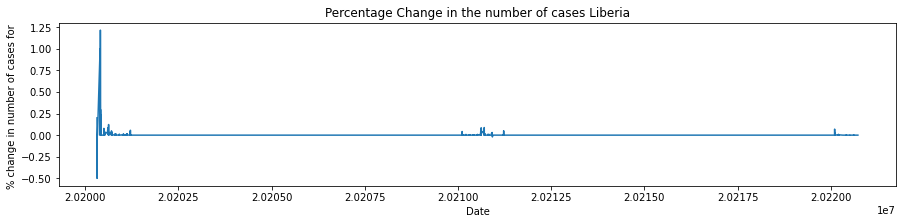

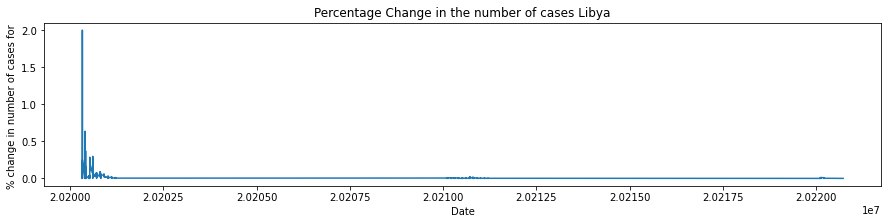

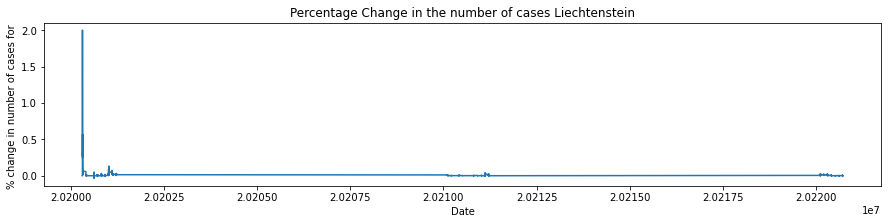

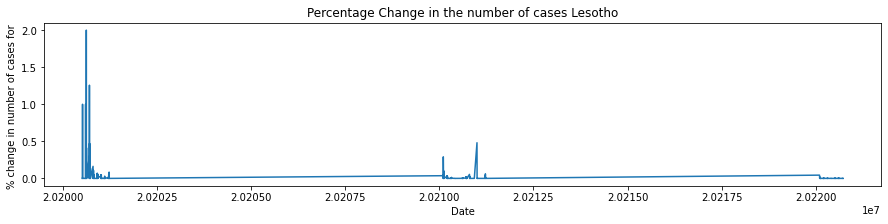

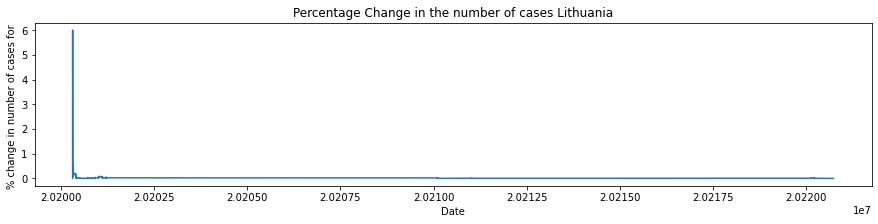

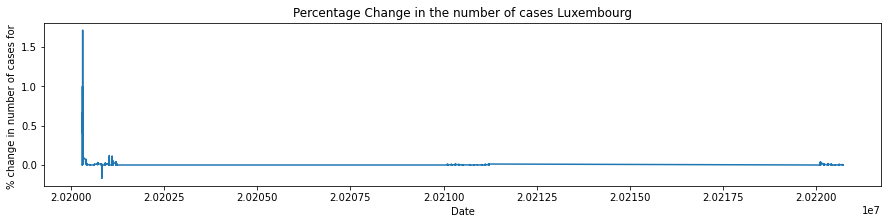

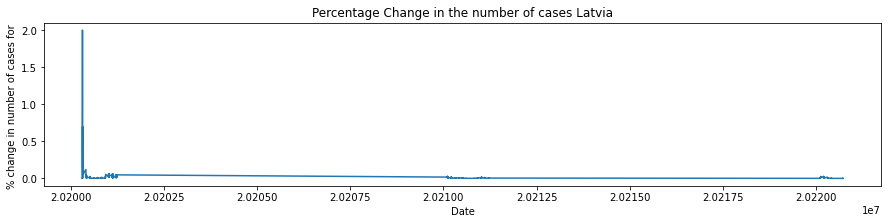

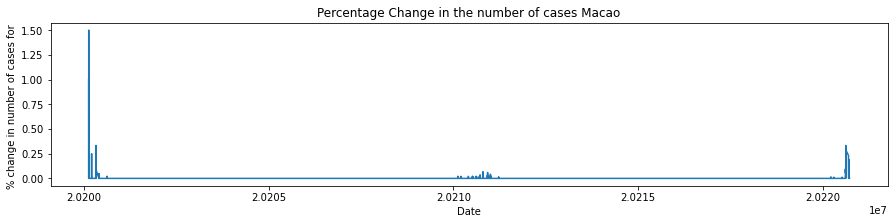

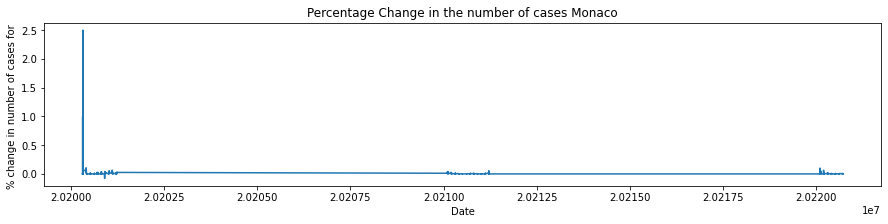

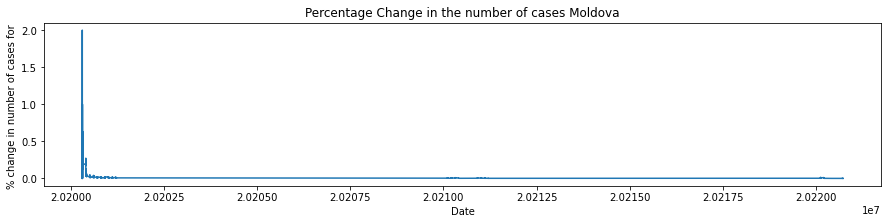

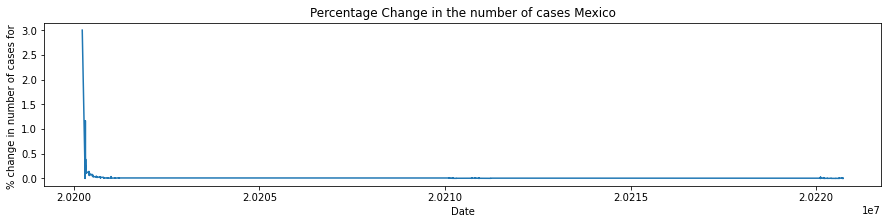

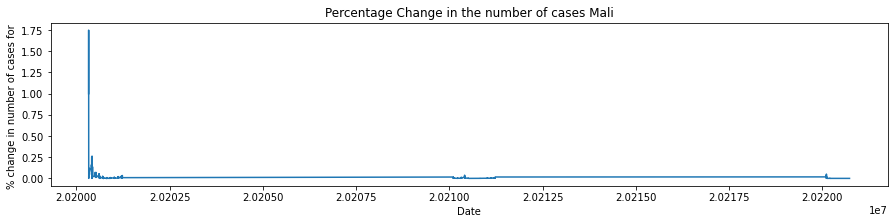

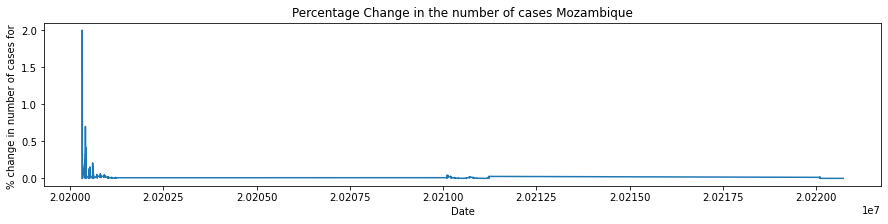

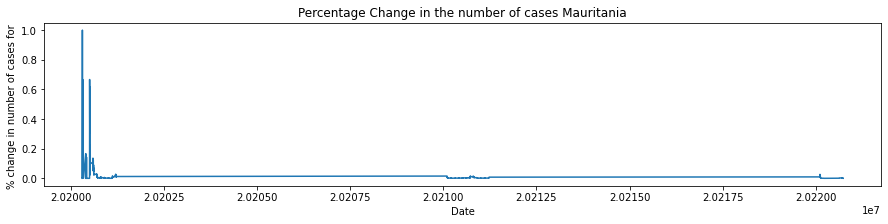

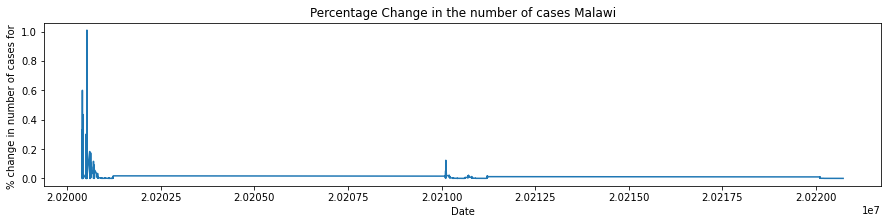

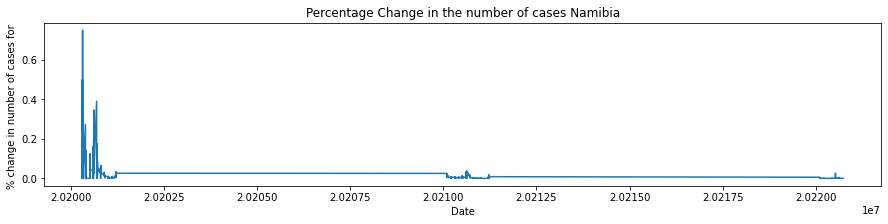

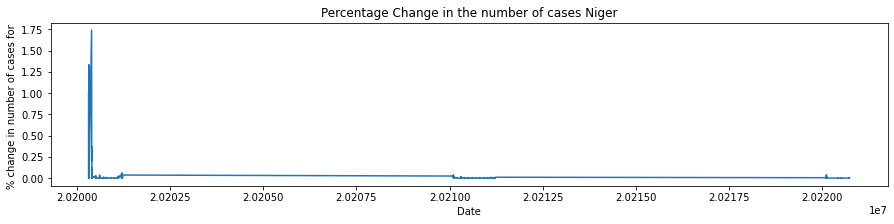

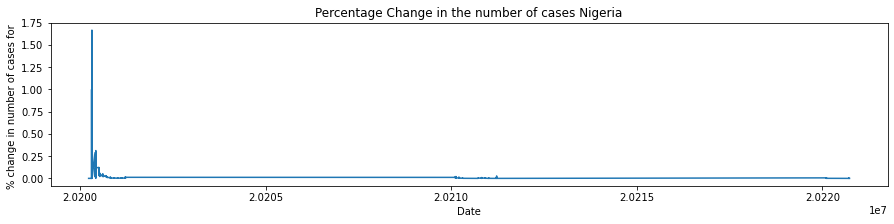

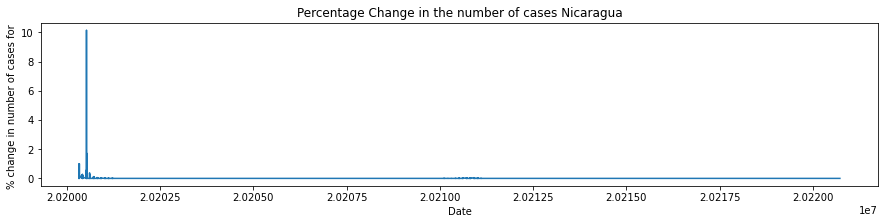

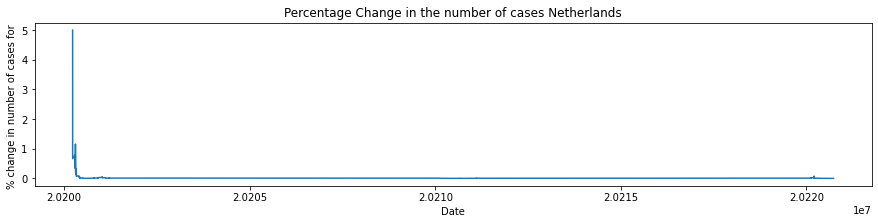

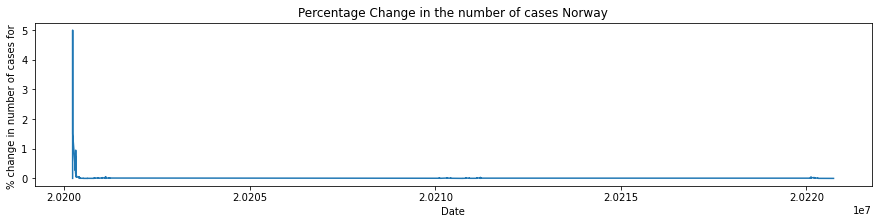

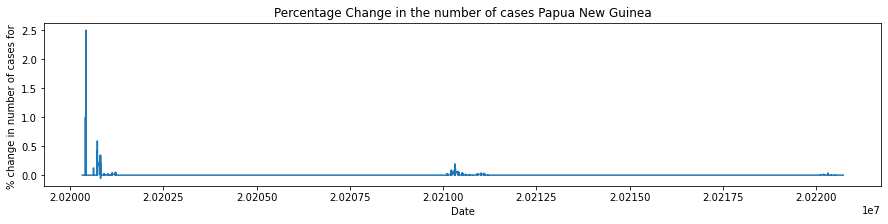

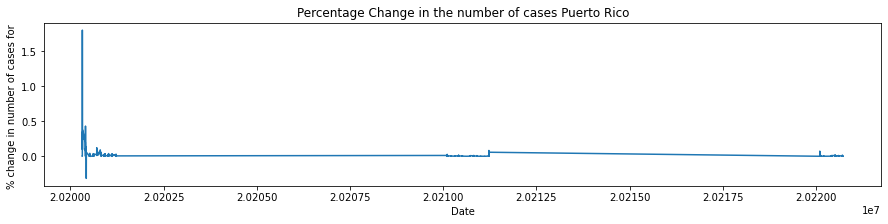

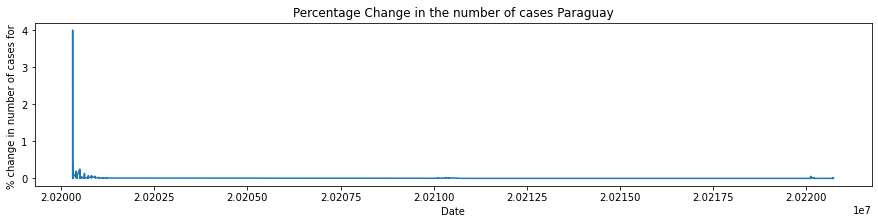

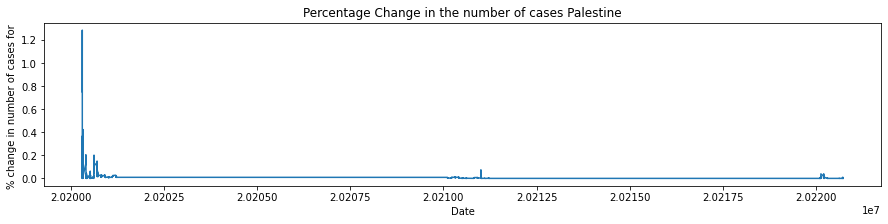

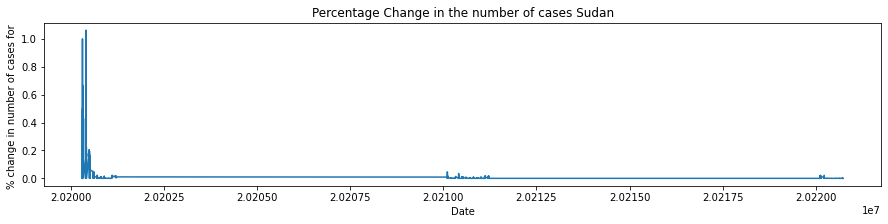

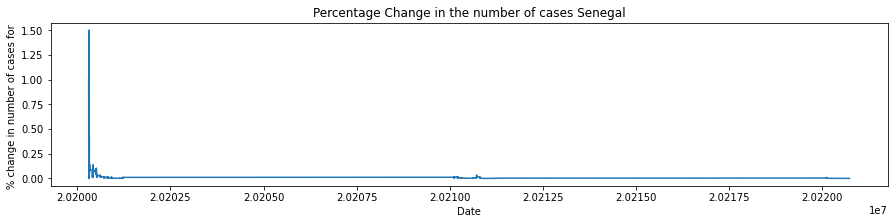

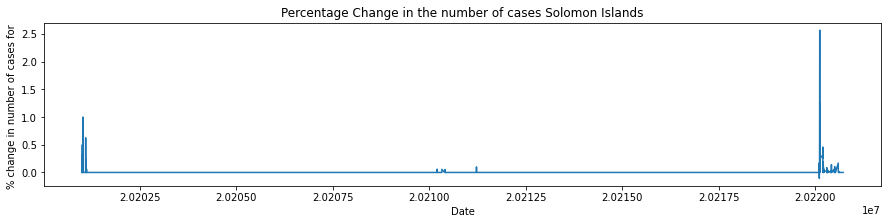

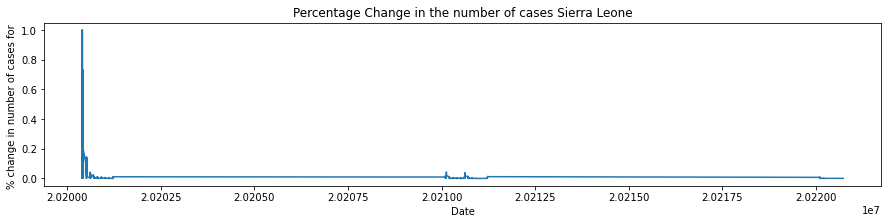

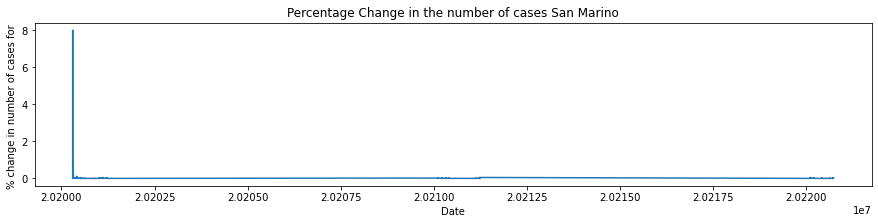

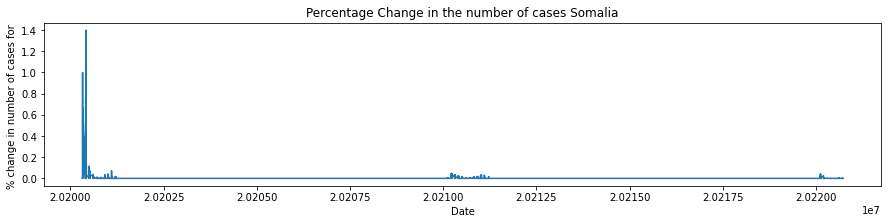

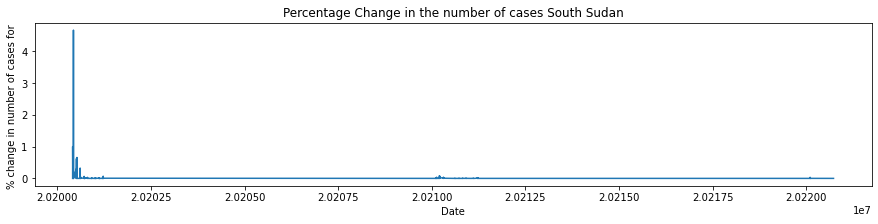

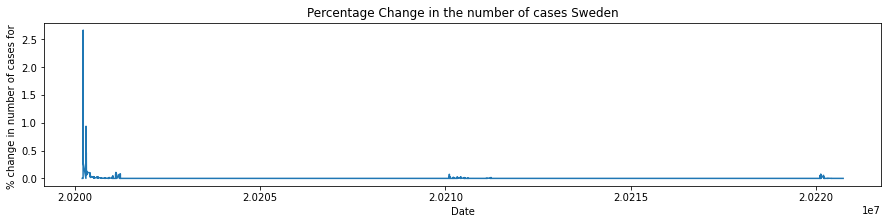

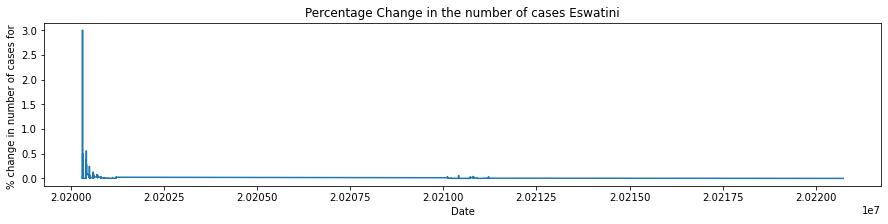

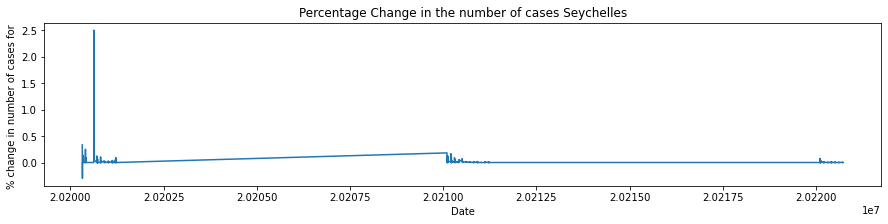

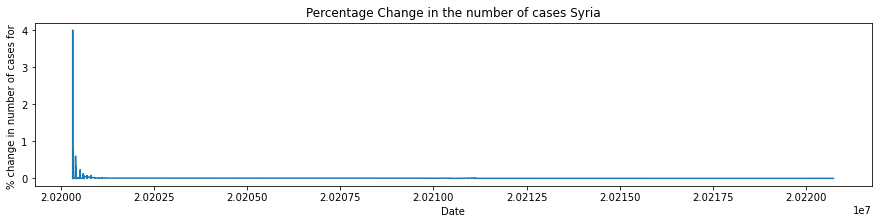

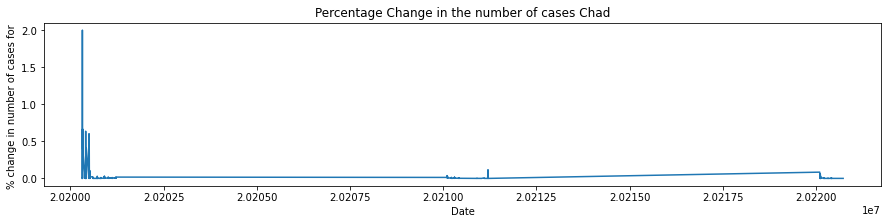

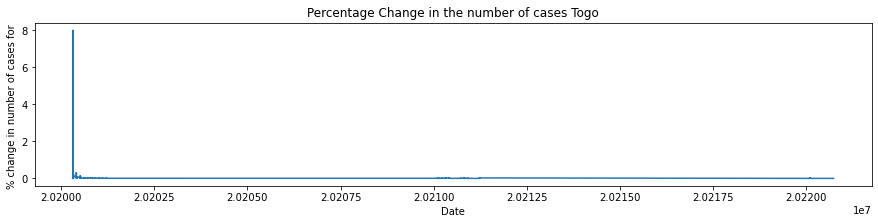

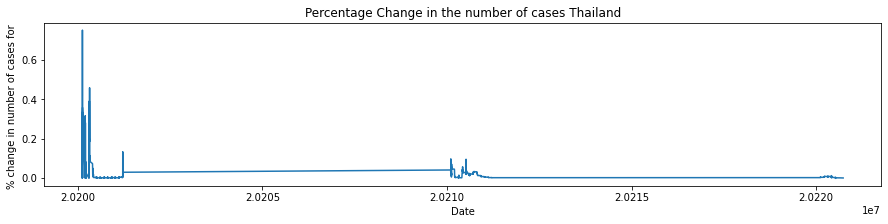

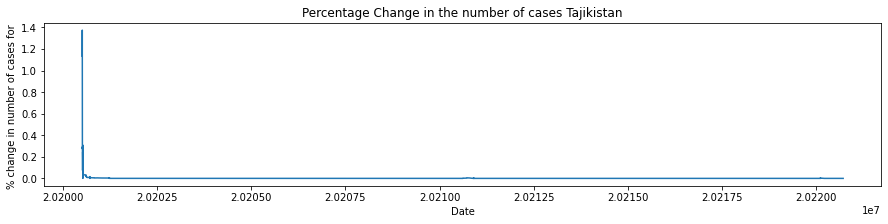

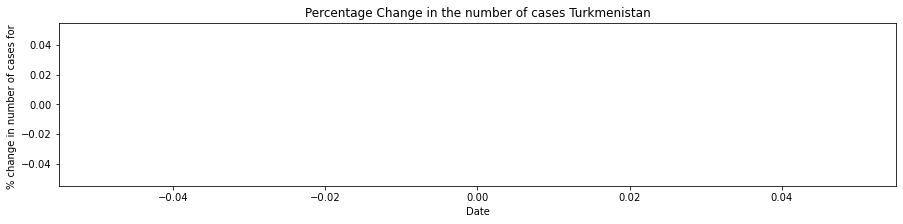

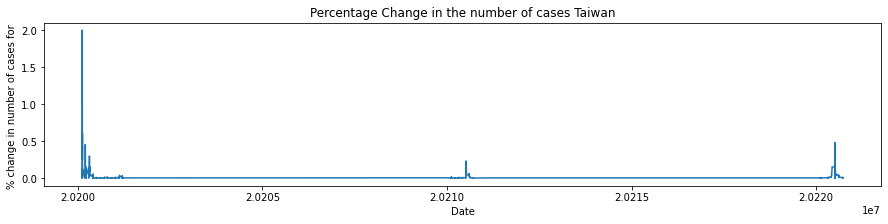

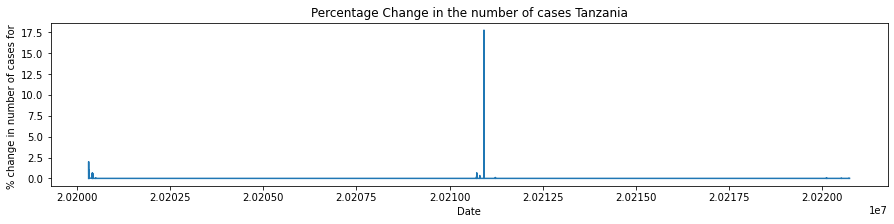

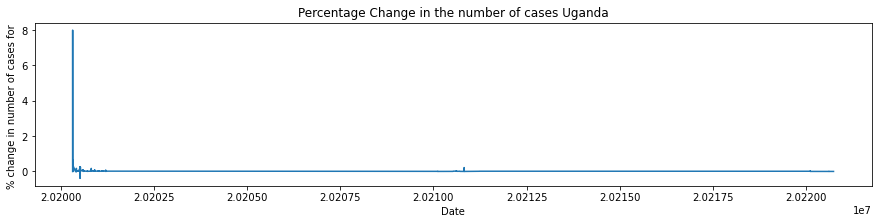

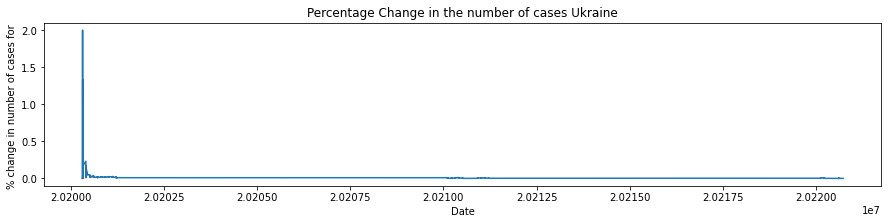

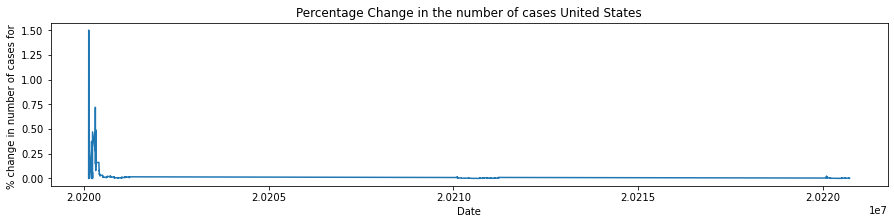

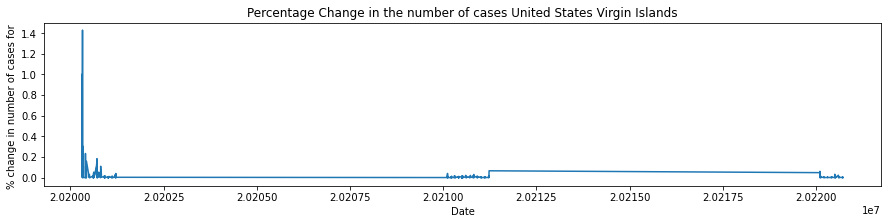

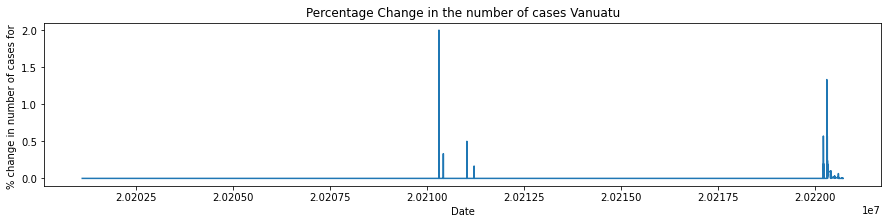

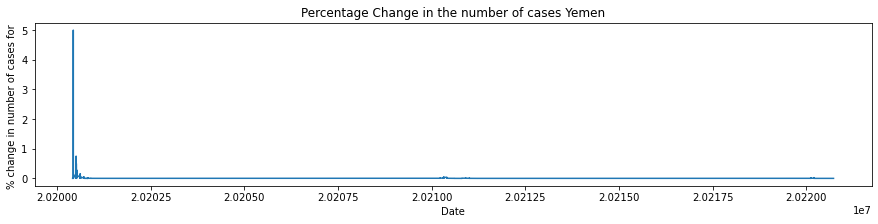

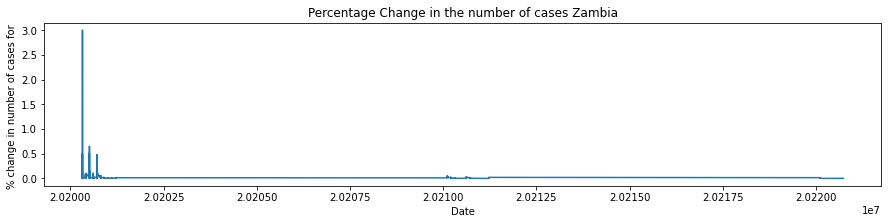

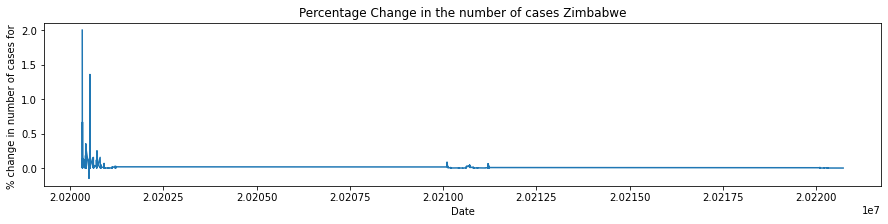

In [104]:
for country in countrydata[countrydata['group']==0]['CountryName'].unique():
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(fulldata[fulldata["CountryName"]==country]["Date"], fulldata[fulldata["CountryName"]==country]["ConfirmedCases"].pct_change())
    plt.title("Percentage Change in the number of cases "+country)
    plt.xlabel("Date")
    plt.ylabel("% change in number of cases for ")

In [105]:
fulldata['percentagechange']=fulldata["ConfirmedCases"].pct_change().apply(lambda x: 0 if x==np.inf else x)
print((fulldata['percentagechange'].mean()))

for country in countrydata['CountryName'].unique():
    countrydata.loc[countrydata['CountryName']==country,'AvGrowthRate']=fulldata[fulldata["CountryName"]==country]["percentagechange"].mean()


0.016061312511033602


<AxesSubplot:xlabel='group', ylabel='AvGrowthRate'>

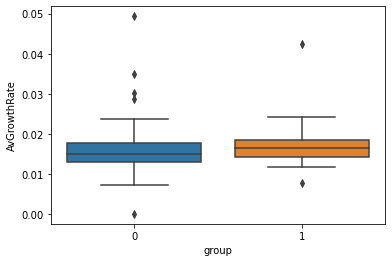

In [106]:
sns.boxplot(y='AvGrowthRate', x ='group', data = countrydata)

In [107]:
from scipy.stats import  ttest_ind
#T test for different means
a=countrydata[countrydata['group']==1]['AvGrowthRate']
b=countrydata[countrydata['group']==0]['AvGrowthRate']
T,p=ttest_ind(a,b)
print('pvalue:',p)
print("Average for group 1:",a.mean())
print("Average for group 0:",b.mean())

pvalue: 0.19555337586638058
Average for group 1: 0.016804426183839847
Average for group 0: 0.01582657580043387


It looks like considering all countries, group 1 has a statistically significant different mean in the average growth rate of the number of cases. 

In [111]:
countriesinea=['Uganda','Kenya','Rwanda','Burundi', 'South Sudan']
EAcountrydata=countrydata[countrydata['CountryName'].isin(countriesinea)]

In [109]:
EAcountrydata['group']=EAcountrydata['MaxResponse'].apply(lambda x: 1 if x>77 else 0)
#T test for different means
a=EAcountrydata[EAcountrydata['group']==1]['AvGrowthRate']
b=EAcountrydata[EAcountrydata['group']==0]['AvGrowthRate']
T,p=ttest_ind(a,b)
print(p)
print("Average for group 1 in EastAfrica:",a.mean())
print("Average for group 0 in EastAfrica:",b.mean())

nan
Average for group 1 in EastAfrica: 0.01579607214301636
Average for group 0 in EastAfrica: 0.01584144679457847


C:\Users\HP 14S\AppData\Local\Temp\ipykernel_10680\3473189415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EAcountrydata['group']=EAcountrydata['MaxResponse'].apply(lambda x: 1 if x>77 else 0)
C:\Users\HP 14S\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP 14S\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


When considering countries in East Africa, there is no significant difference between the average growth rate of the number of COVID cases between the two groups of countries. 

# **Conclusions**
The exploratory data analysis suggested a possible hypothesis that the countries with higher maximum response rate would have different average growth rate of the number of cases.

This hypothesis was tested for a) all countries available in the dataset and b) East African countries available in the dataset.

The countries were divided into two groups: group 1 had maximum response rate higher than the mean across the group ( In case (a) 75 and (b) 77), and group 0 had the maximum response rate equal or lower than the mean across the group.

Then, the average growth of number of cases was estimated taking the mean of percentage change in the number of cases throughout the pandemic. Note, this is a very primitive way to estimate the quantity of interest because we would be interested in the average growth rate of the number of cases *after* the imposition of the maximum response. 

Finally, the t test was performed to evaluate if any statistically significant difference exists between the mean average growth rate of the number of cases between the two groups.

The results are as follows:

a) pvalue: 0.19555337586638058,
Average growth rate for group 1: 0.016804426183839847, 
Average growth rate for group 0: 0.016804426183839847

b) pvalue: 0.785811163035, 
Average growth rate for group 1 in East Africa: 0.01579607214301636, 
Average growth rate for group 0 in East Africa: 0.01584144679457847

Clearly, the maximum response rate of East African countries had a significant effect in explaining the average growth rate of the number of cases, while some significance was observed across all countries in the dataset. This suggests that East African countries imposed similar level of pandemic control and thus should be grouped not according to the response rate but rather by geographic/demographic features if the effect of different mitigation measures were to be investigated.

If this direction of ivestigation was chosen, more elaborate methods should be used to re-evaluate the relationship. 